In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import tensorflow as tf
import scipy.io

In [2]:
from data_preprocessing import normalizer
from model import wave_u_net
from unet_config import config
from utils import plot_heartecg, plot_loss

In [3]:
model_config = config()

In [4]:
params = {
  "num_initial_filters": model_config["num_initial_filters"],
  "num_layers": model_config["num_layers"],
  "kernel_size": model_config["kernel_size"],
  "merge_filter_size": model_config["merge_filter_size"],
  "source_names": model_config["source_names"],
  "num_channels": model_config["num_channels"], 
  "num_channels_output": model_config["num_channels_output"],
  "output_filter_size": model_config["output_filter_size"],
  "padding": model_config["padding"],
  "input_size": model_config["input_size"],
  "context": model_config["context"],
  "upsampling_type": model_config["upsampling_type"],         # "learned" or "linear"
  "output_activation": model_config["output_activation"],        # "linear" or "tanh"
  "output_type": model_config["output_type"],          # "direct" or "difference" 
  "dropout_rate": model_config["dropout_rate"],
}

In [5]:
m = wave_u_net(**params)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `

In [6]:
history=np.load(model_config["output_path"]+'/history/history1.npy', allow_pickle='TRUE').item()

In [7]:
print(history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


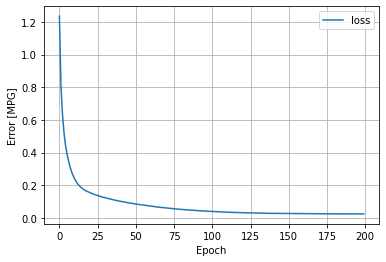

In [8]:
plot_loss(history)

Recover the patient numbers and plot them from the dataset

In [9]:
hr_1_list = np.load(model_config["output_path"]+'/test_predictions/hr_1_list.npy')
hr_2_list = np.load(model_config["output_path"]+'/test_predictions/hr_2_list.npy')

['hr_1_extracted', 'hr_1_original', 'hr_2_extracted', 'hr_2_original', 'twin_hr']


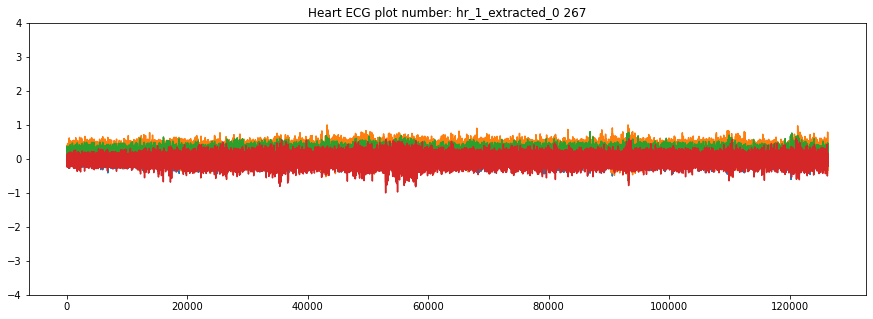

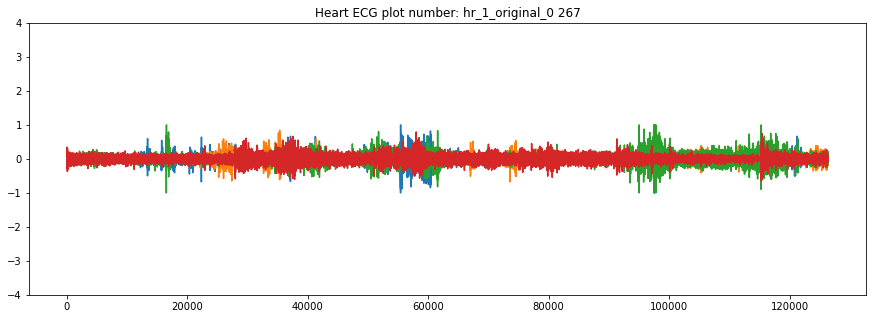

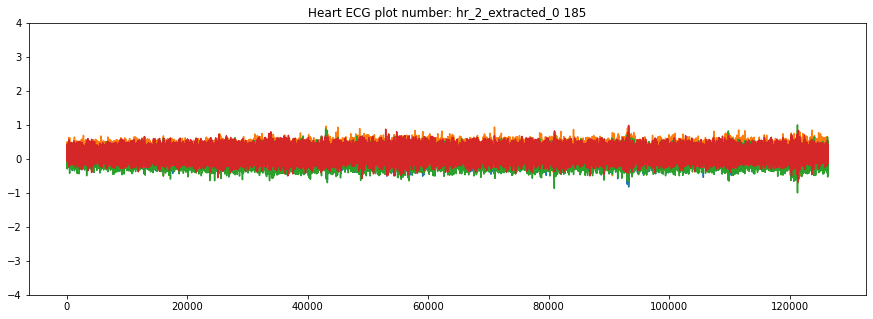

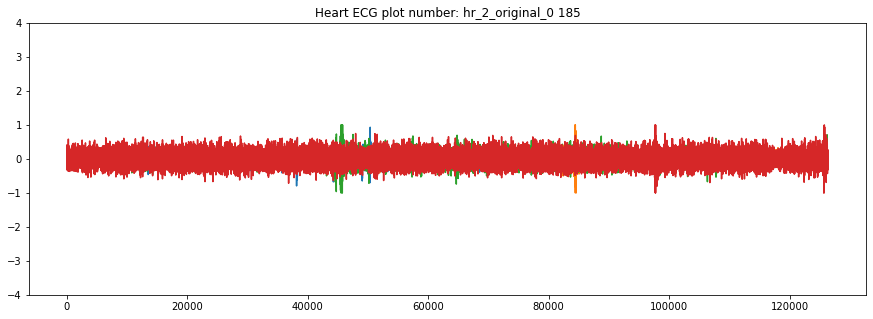

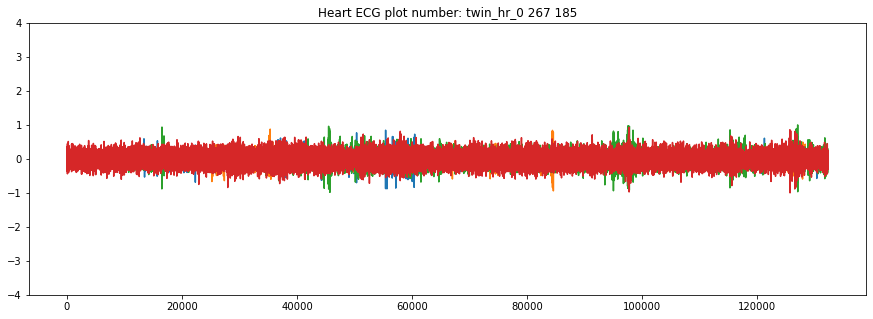

['hr_1_extracted', 'hr_1_original', 'hr_2_extracted', 'hr_2_original', 'twin_hr']


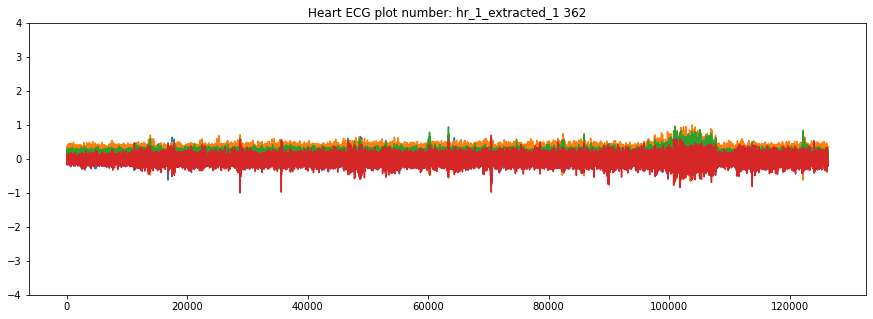

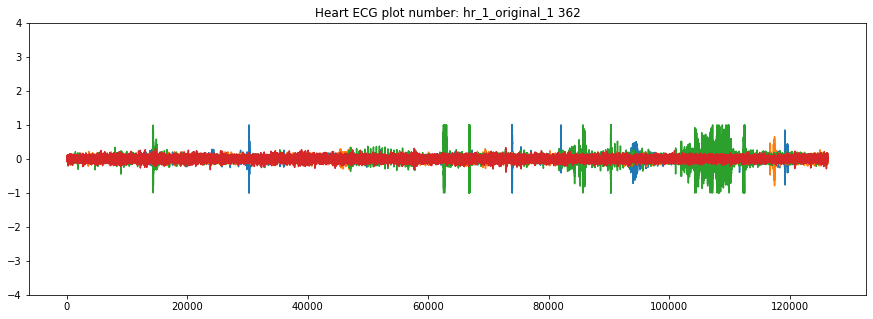

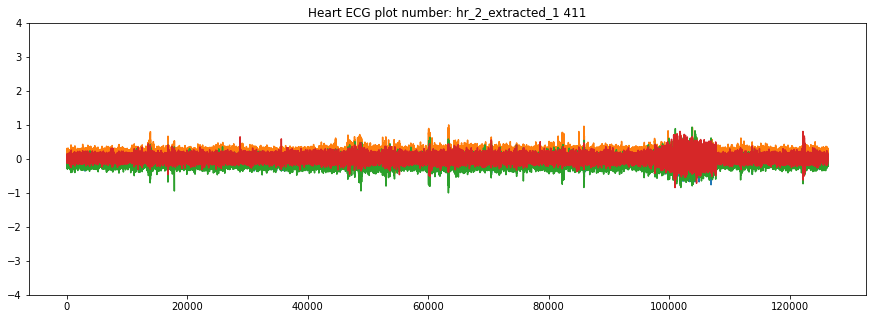

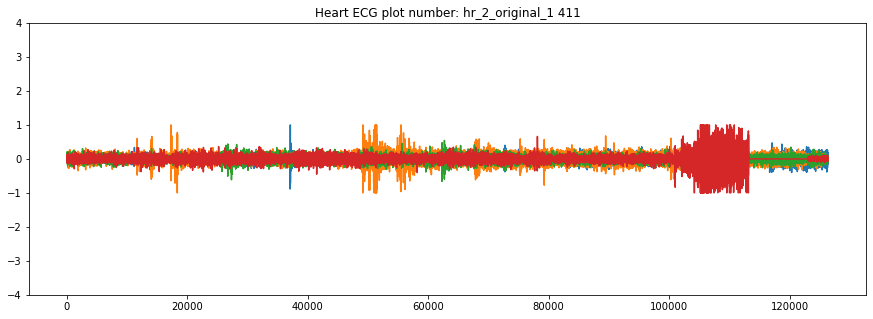

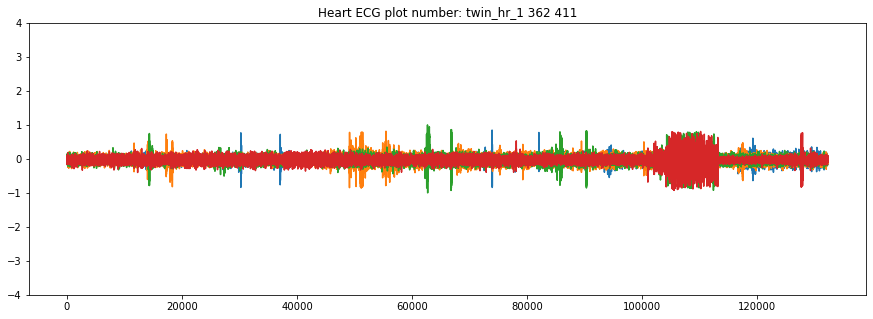

['hr_1_extracted', 'hr_1_original', 'hr_2_extracted', 'hr_2_original', 'twin_hr']


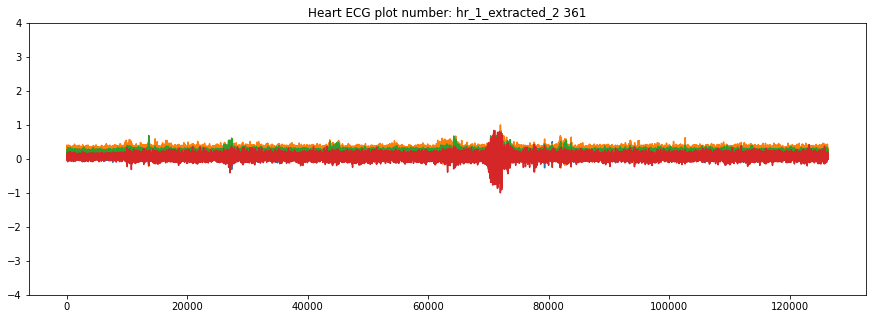

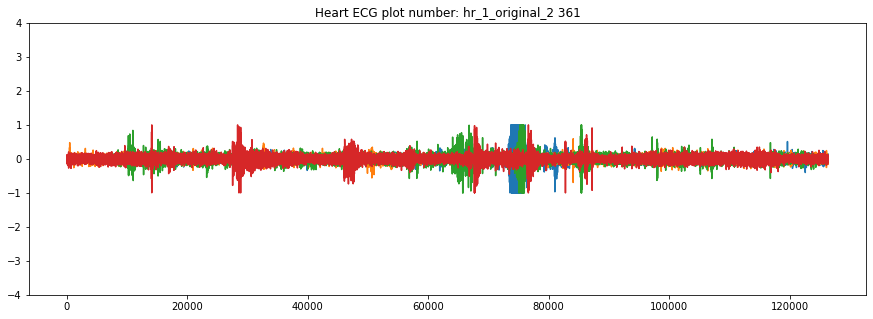

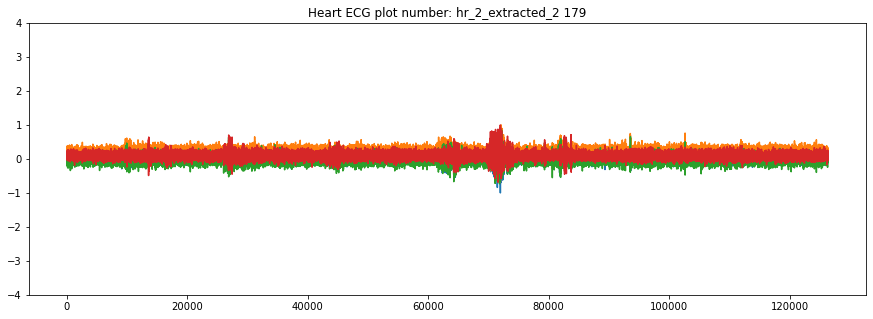

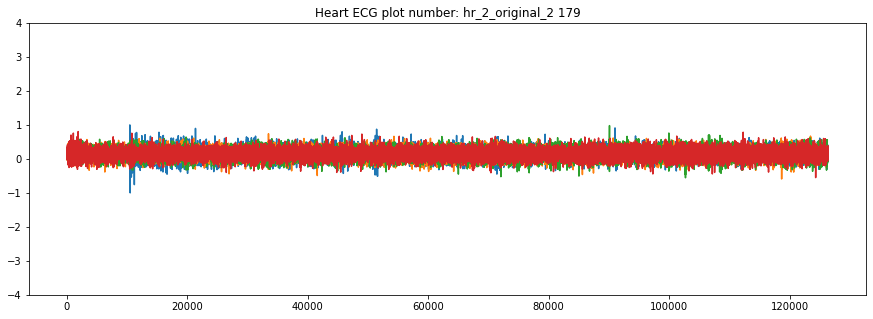

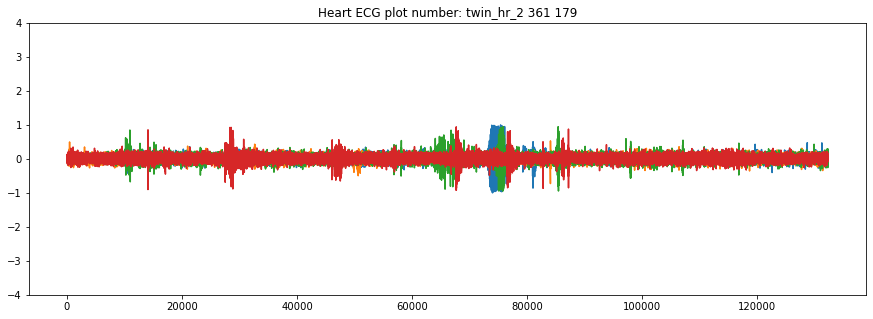

['hr_1_extracted', 'hr_1_original', 'hr_2_extracted', 'hr_2_original', 'twin_hr']


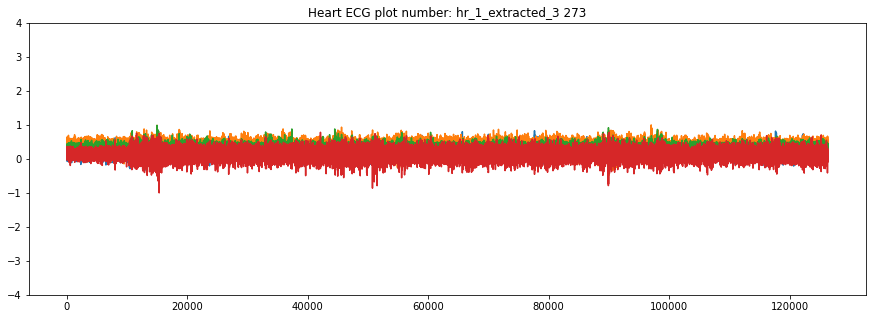

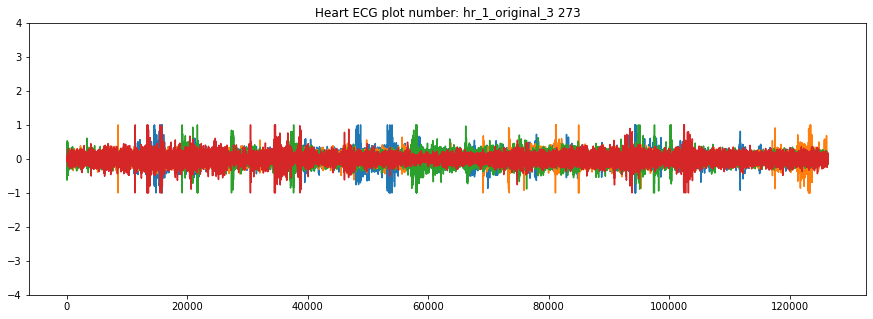

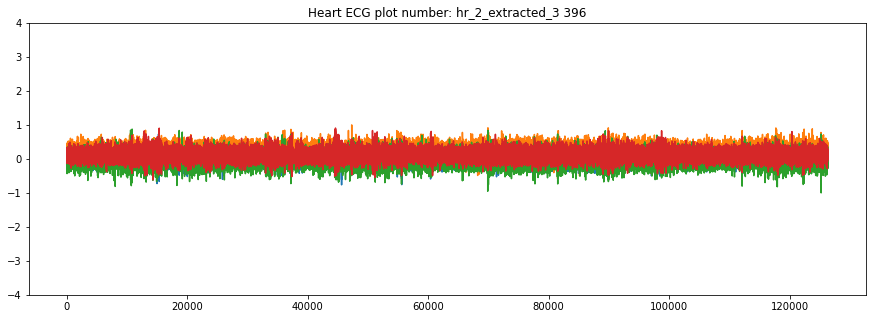

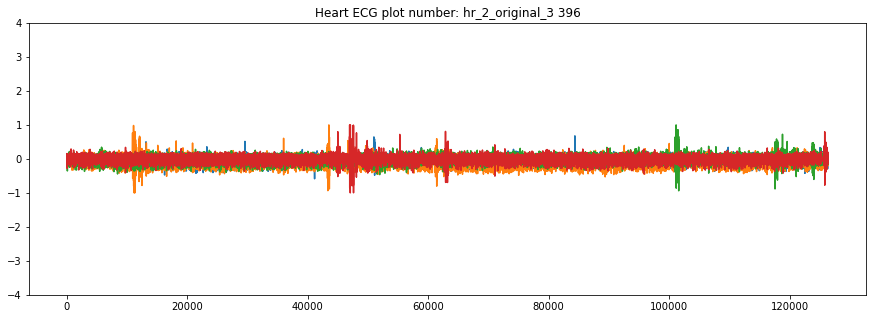

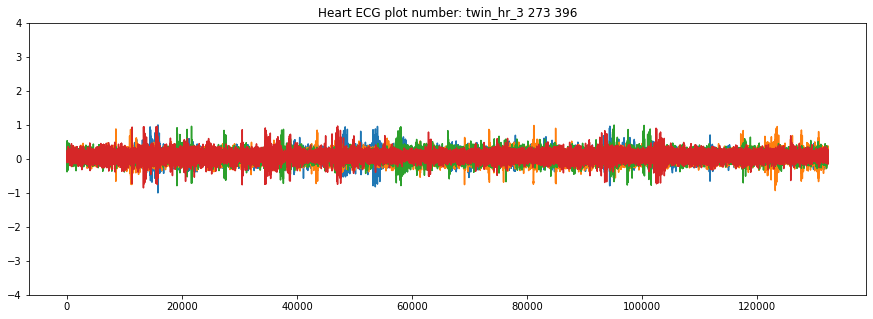

['hr_1_extracted', 'hr_1_original', 'hr_2_extracted', 'hr_2_original', 'twin_hr']


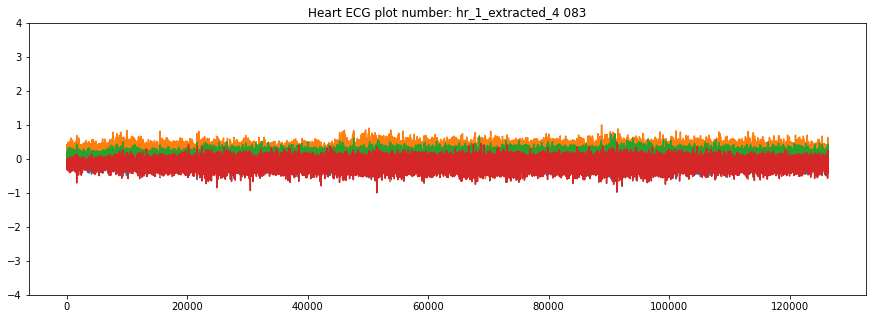

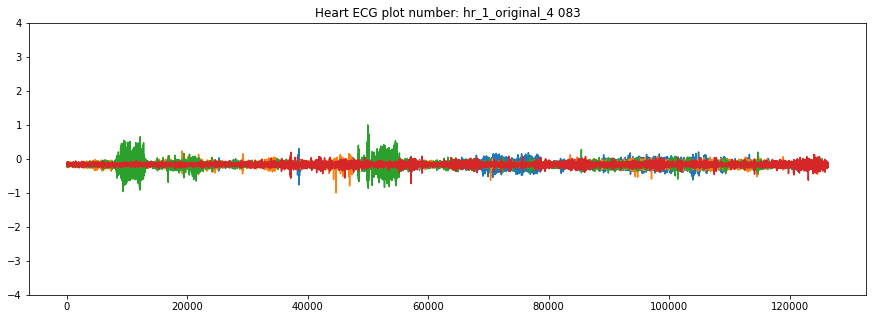

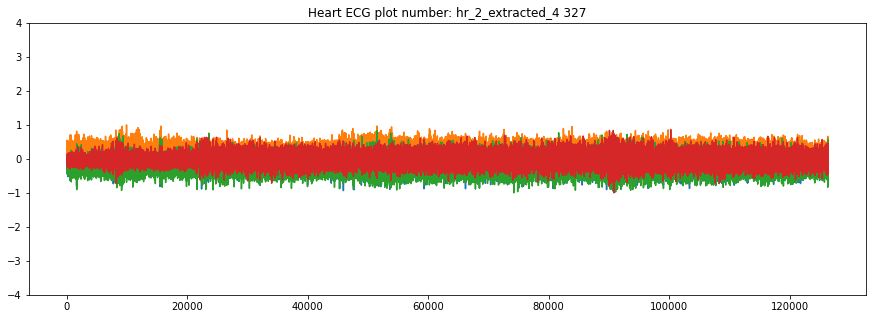

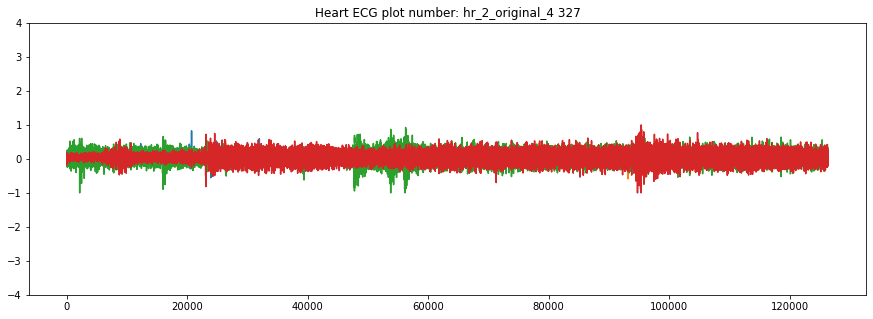

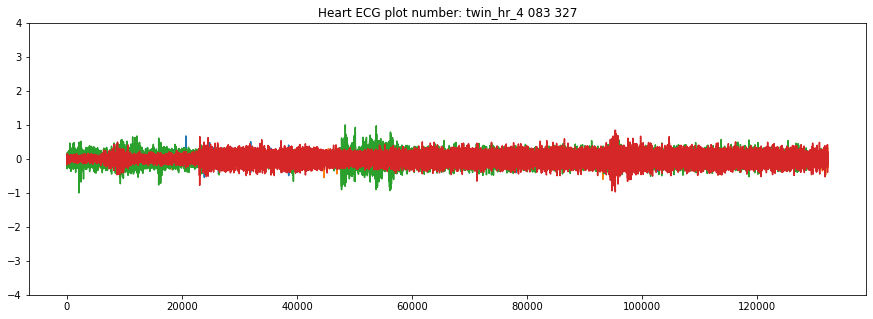

['hr_1_extracted', 'hr_1_original', 'hr_2_extracted', 'hr_2_original', 'twin_hr']


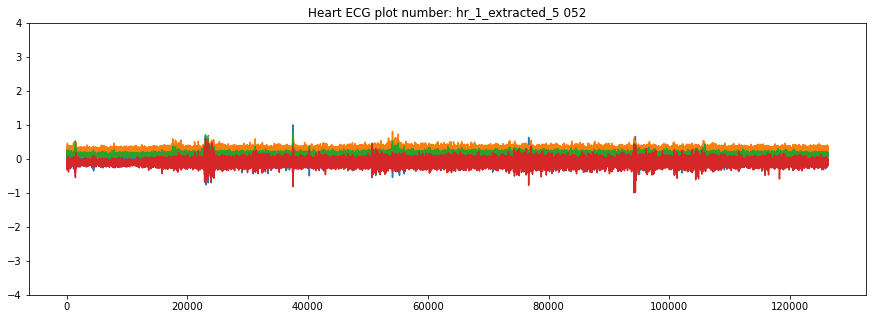

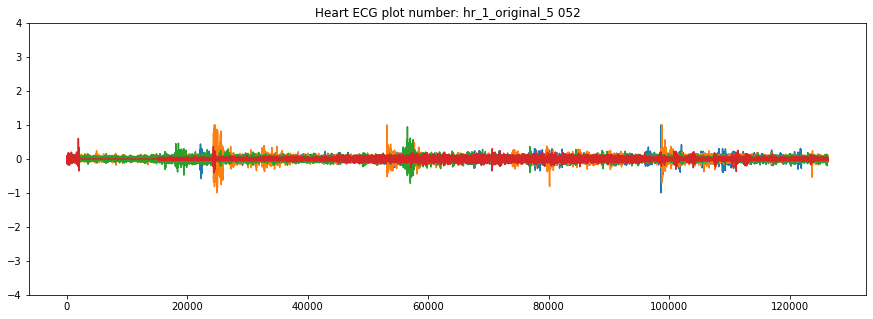

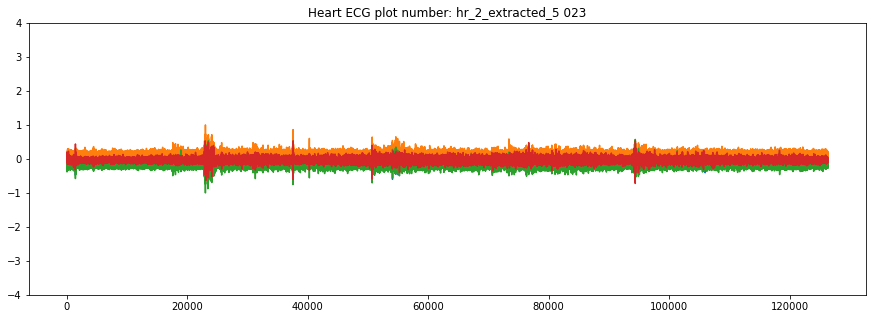

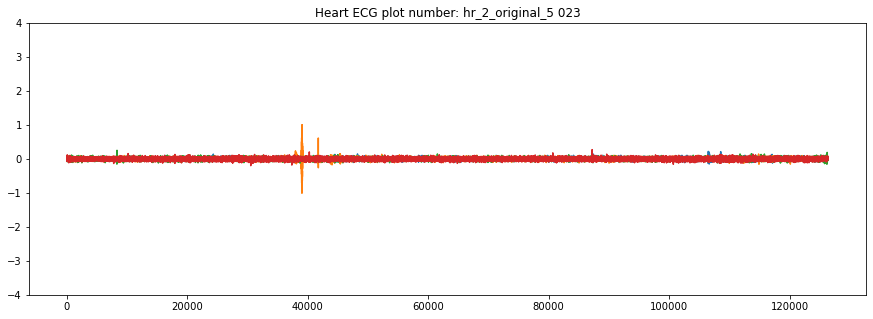

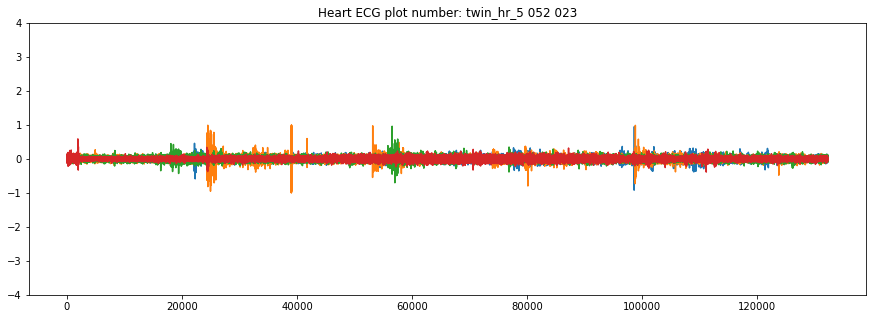

['hr_1_extracted', 'hr_1_original', 'hr_2_extracted', 'hr_2_original', 'twin_hr']


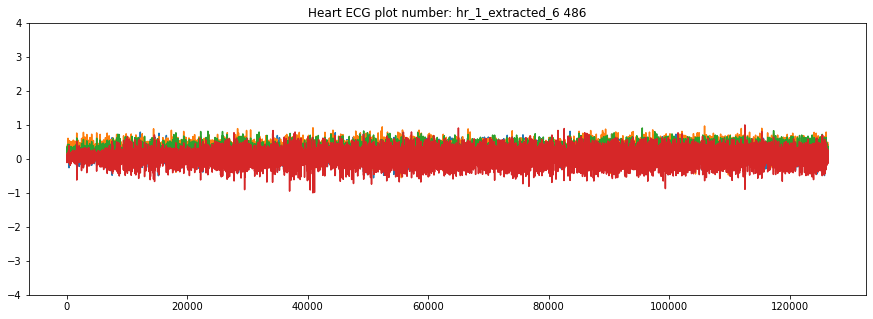

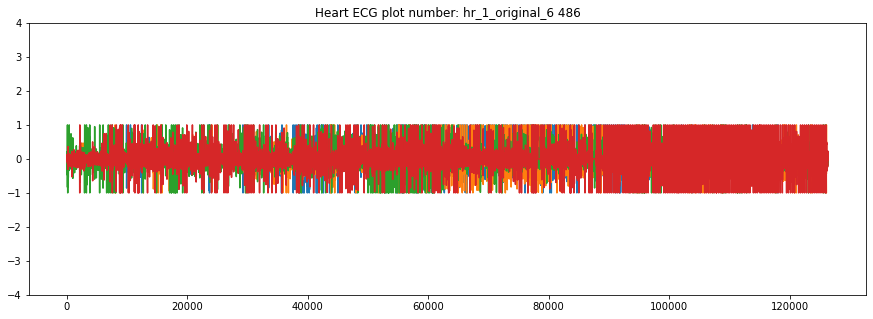

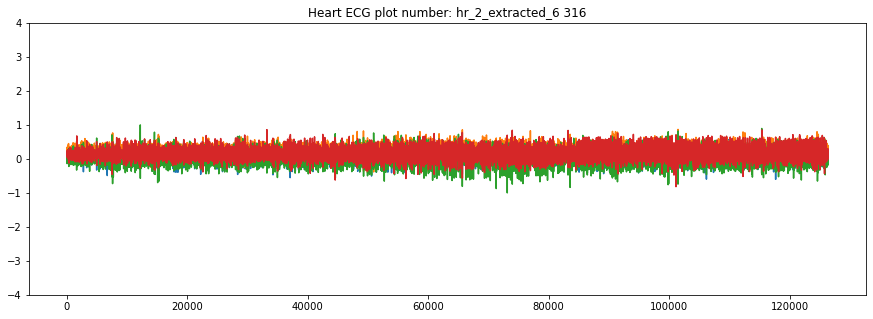

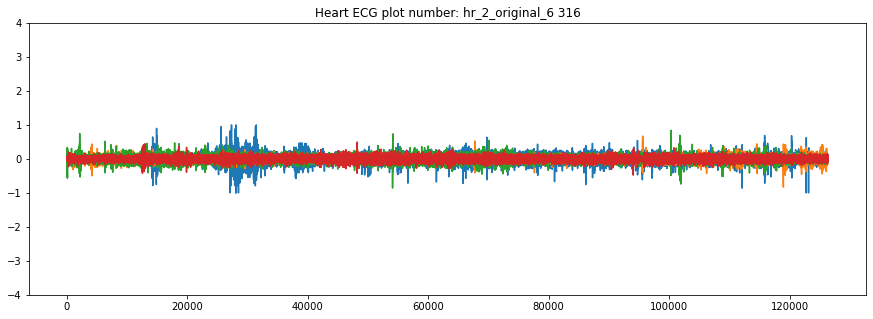

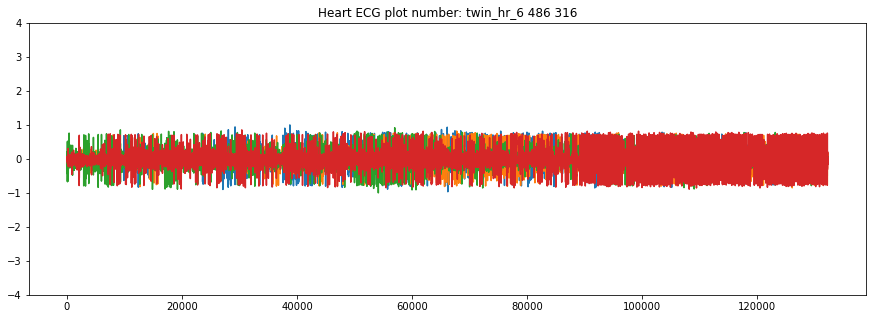

['hr_1_extracted', 'hr_1_original', 'hr_2_extracted', 'hr_2_original', 'twin_hr']


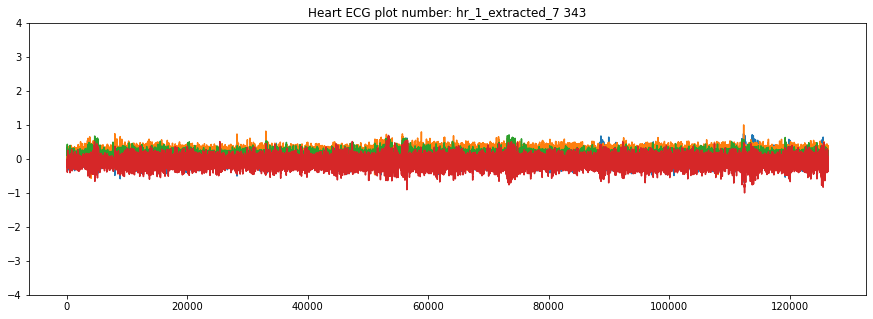

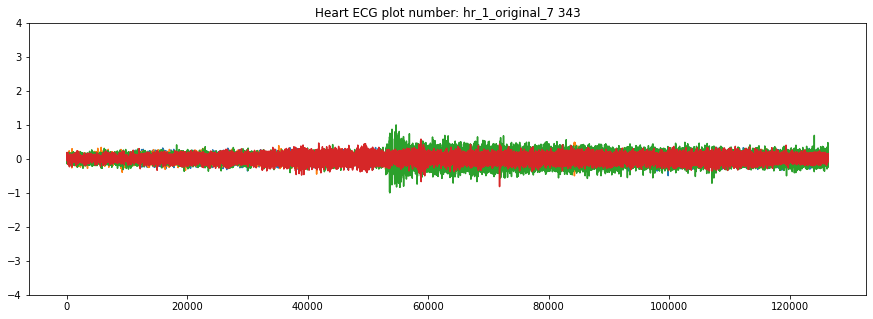

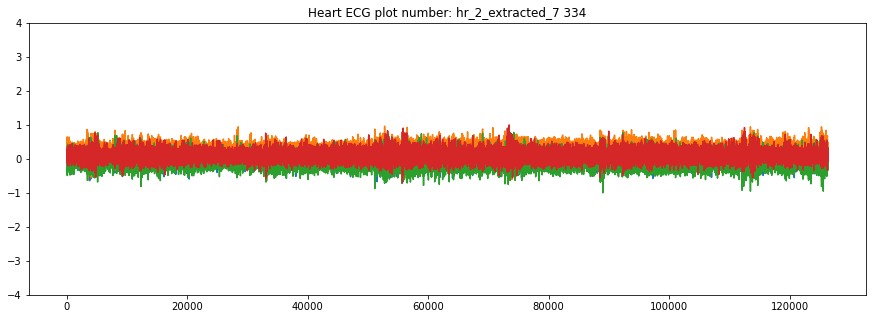

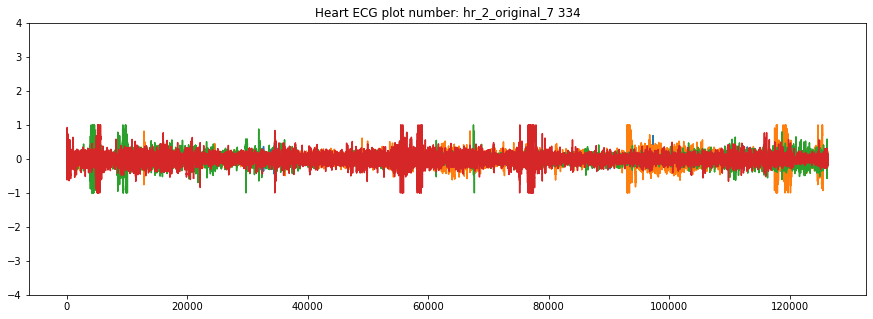

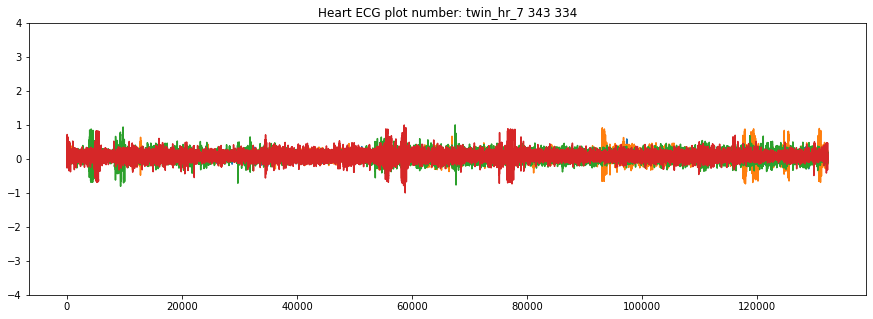

['hr_1_extracted', 'hr_1_original', 'hr_2_extracted', 'hr_2_original', 'twin_hr']


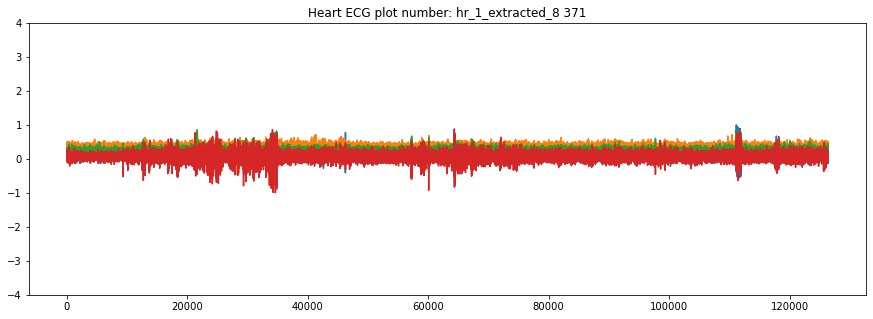

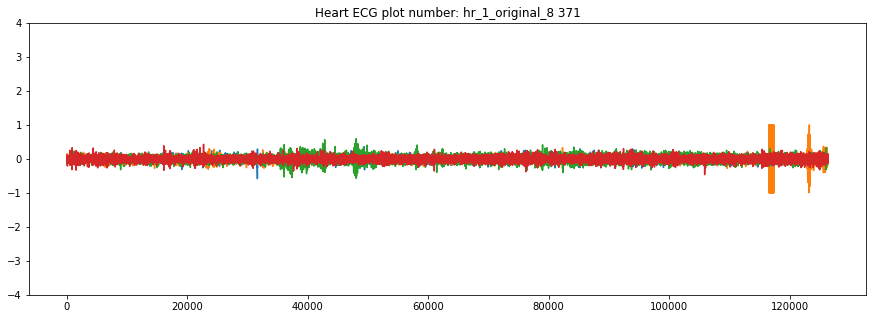

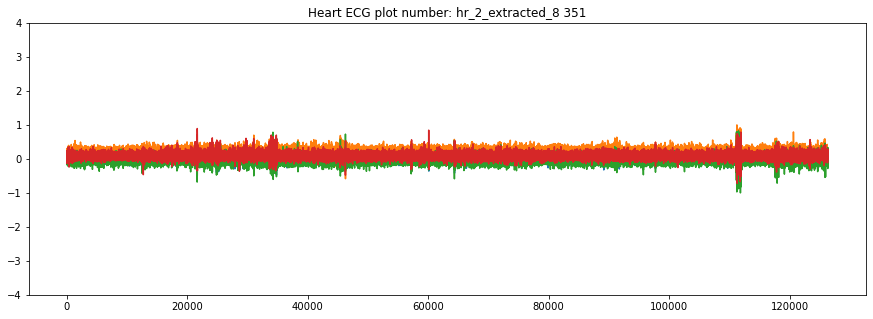

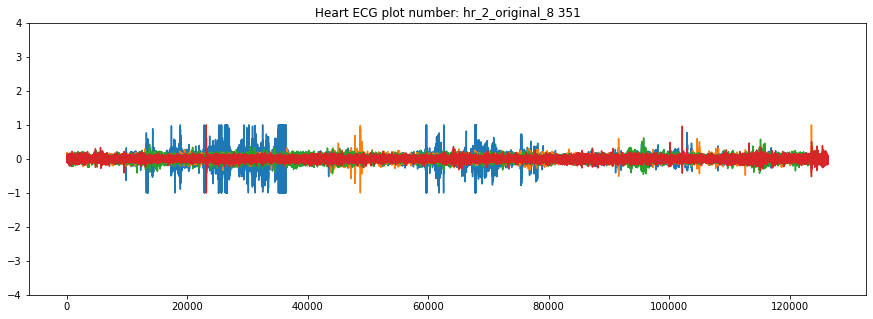

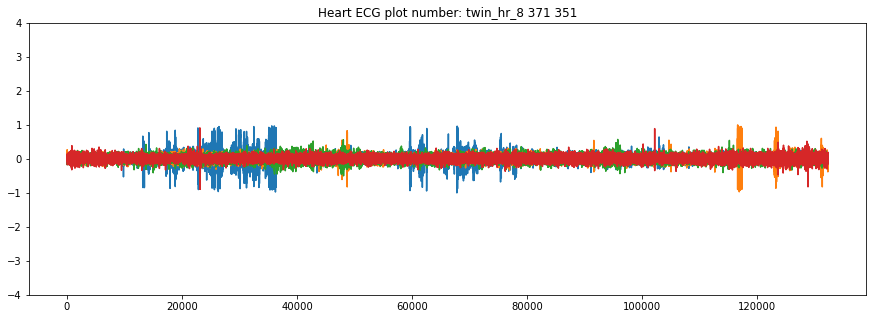

['hr_1_extracted', 'hr_1_original', 'hr_2_extracted', 'hr_2_original', 'twin_hr']


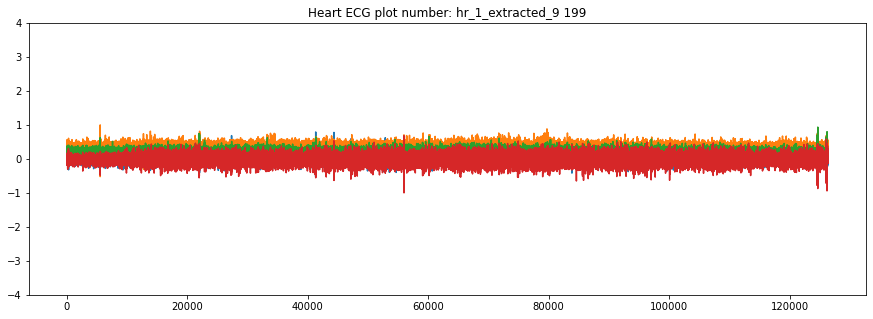

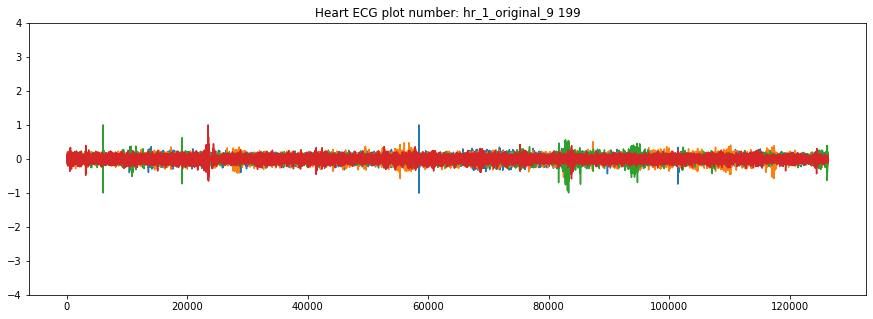

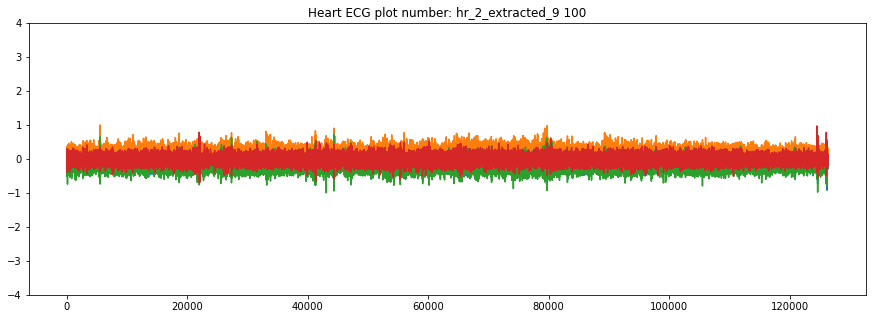

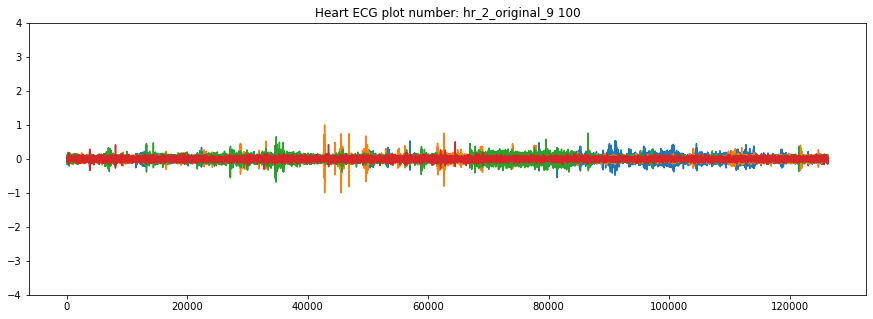

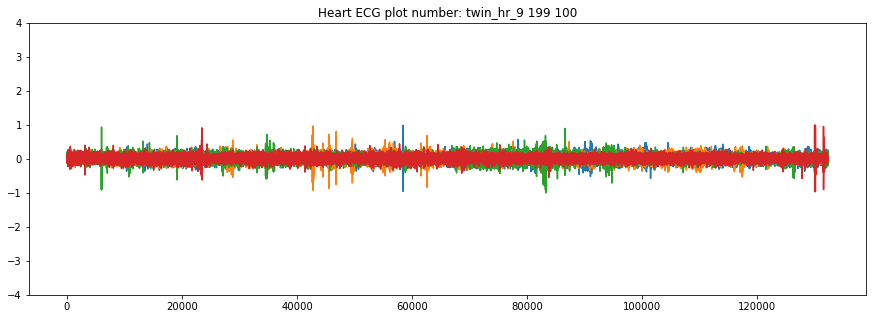

In [10]:
for i in range(len(hr_1_list)):  
    hr_1 = hr_1_list[i] 
    hr_2 = hr_2_list[i] 
    with h5py.File(model_config["output_path"]+f'/test_predictions/patient_{hr_1}{hr_2}.signal', 'r') as f:
        key_list = list(f.keys())
        print(key_list)
        
        for key in key_list:
            data = np.array(f[key])
            
            hr = ''
            if (key == key_list[0] or key == key_list[1]):
                hr = hr_1_list[i]
                if (key == key_list[0]):
                    data = data
            elif (key == key_list[2] or key == key_list[3]):
                hr = hr_2_list[i]
                if (key == key_list[2]):
                    data = data
            else:
                hr = hr_1_list[i] + ' ' + hr_2_list[i]
            
            try:
                plot_heartecg(normalizer(data[0,:,:]), str(key) + f'_{i} ' + hr)
            except: 
                plot_heartecg(normalizer(data.T), str(key) + f'_{i} ' + hr)
            
        

Recover the training data (lot of data, commented out as not always needed)

In [11]:
# x_train = np.load(model_config["output_path"]+'/train_data/x_train.npy')
# y_train = np.load(model_config["output_path"]+'/train_data/y_train.npy')

Recover the trained model weights

In [12]:
savedModel = m.load_weights(model_config["output_path"]+'/model/saved_model_weights')

Load the real data to feed it to the model

In [13]:
mat_file = scipy.io.loadmat(model_config["data_storage_path"]+'/real_twin/fetalSignal_andPeaks.mat')

normalized_twin = normalizer(np.clip(mat_file['fetalSignal'].T, -20, 20))

In [14]:
real_data = normalizer(np.clip(mat_file['fetalSignal'].T, -20, 20))

In [15]:
real_data.shape

(1073749, 6)

The model expects data of size 22050, so chop the real data into smaller pieces to feed them to the model 

In [16]:
real_data_chopped = []

old_i = 0
for i in range(22050, real_data.shape[0], 22050):
    real_data_chopped.append(real_data[old_i:i, :4])
    old_i = i

In [17]:
prediction_real_data_chopped = m.predict(np.array(real_data_chopped))

In [18]:
prediction_real_data_chopped.keys()

dict_keys(['heart_ecg'])

In [19]:
prediction_real_data_chopped[model_config["source_names"][0]].shape

(48, 21060, 8)

Plot the extracted ECGs

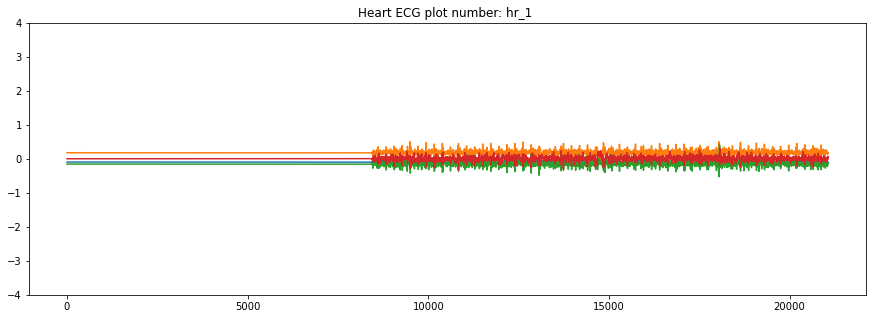

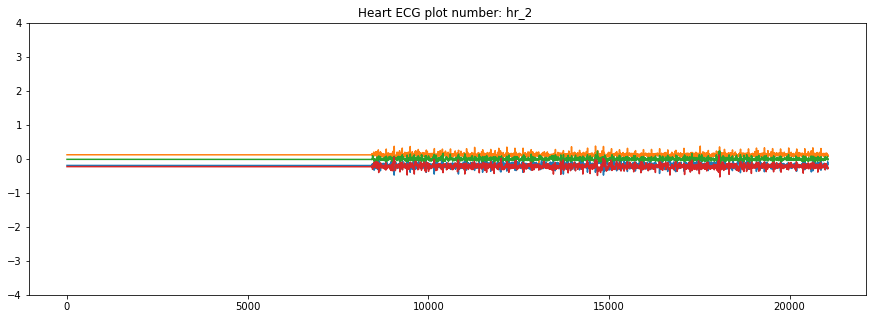

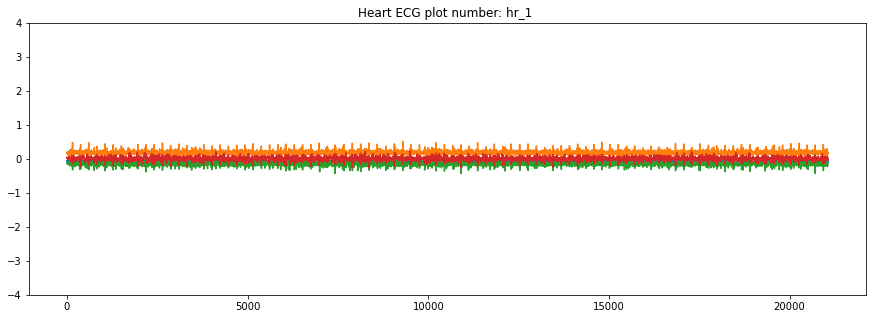

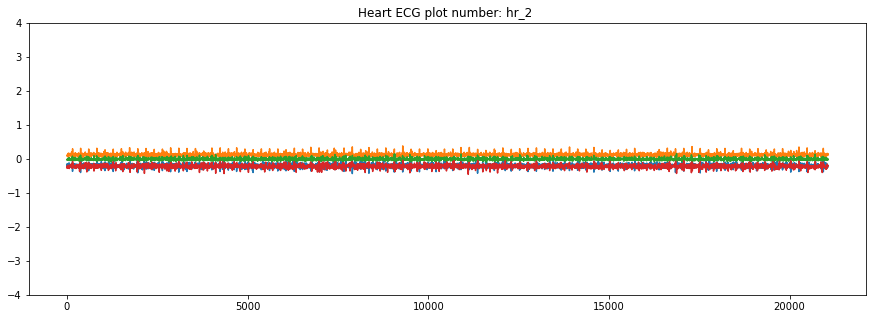

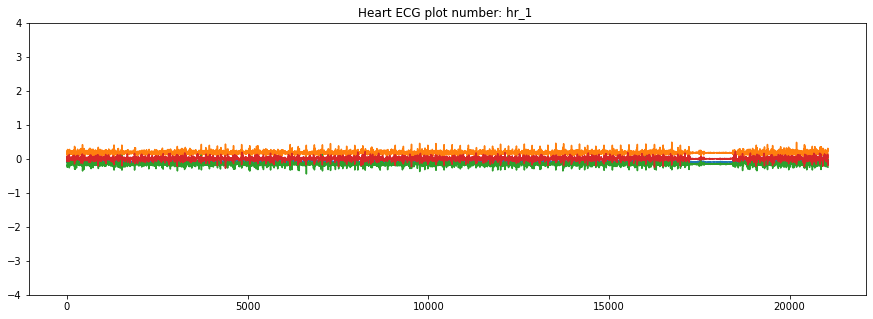

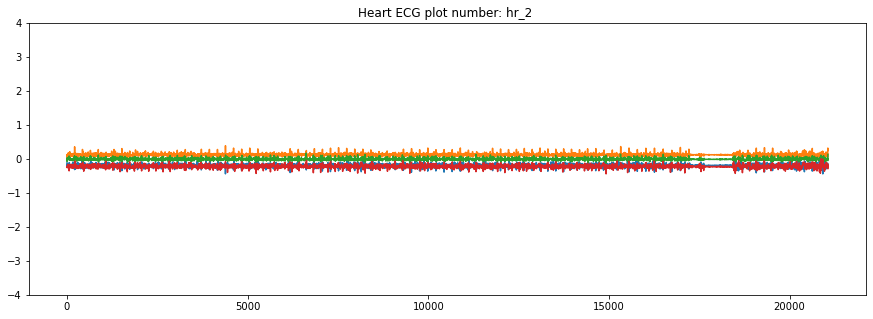

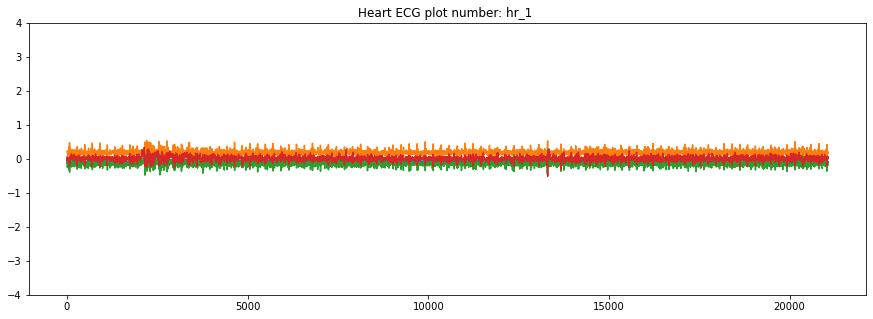

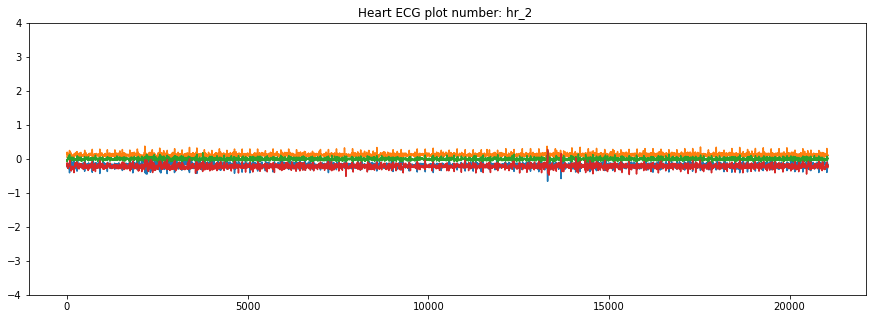

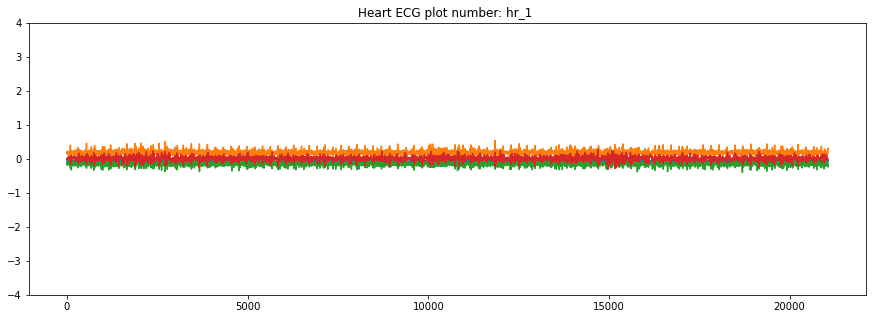

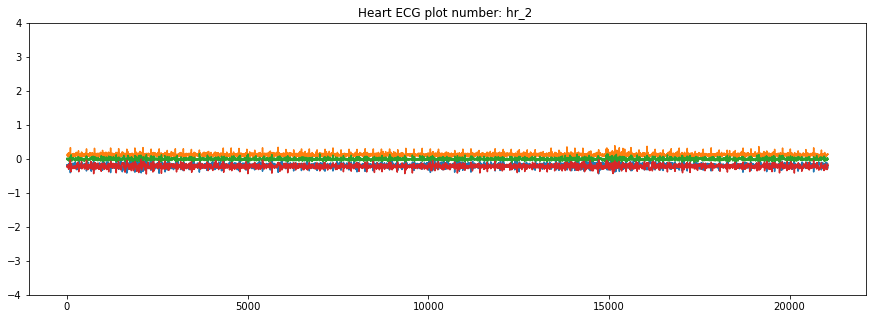

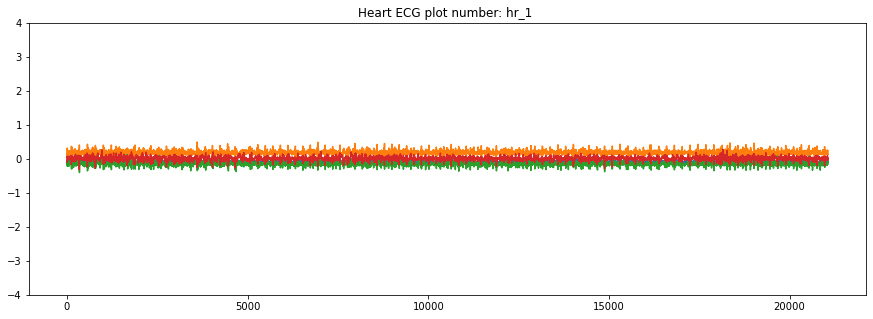

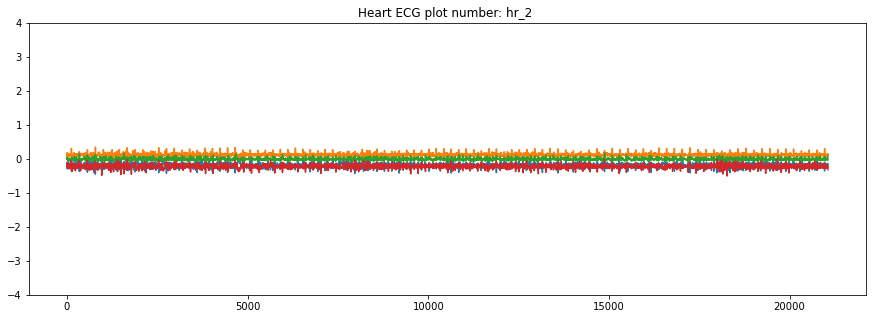

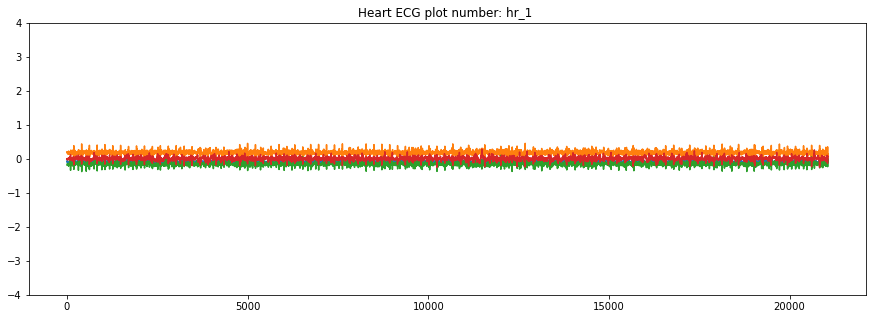

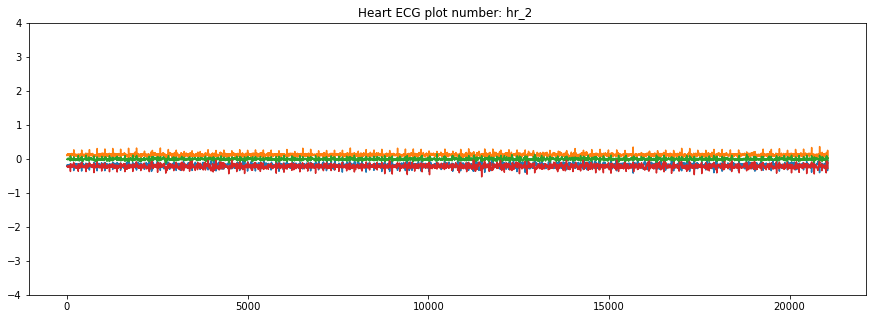

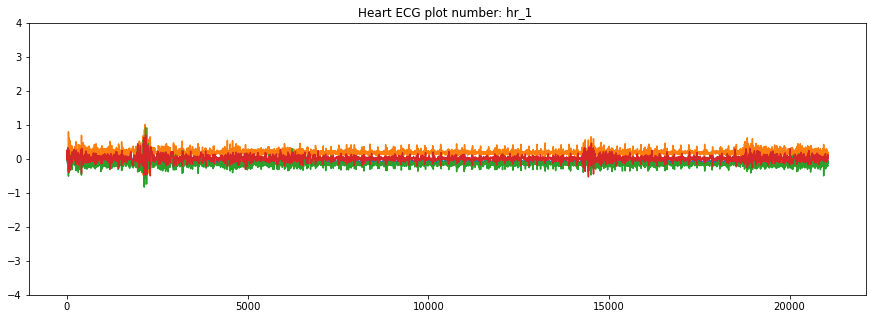

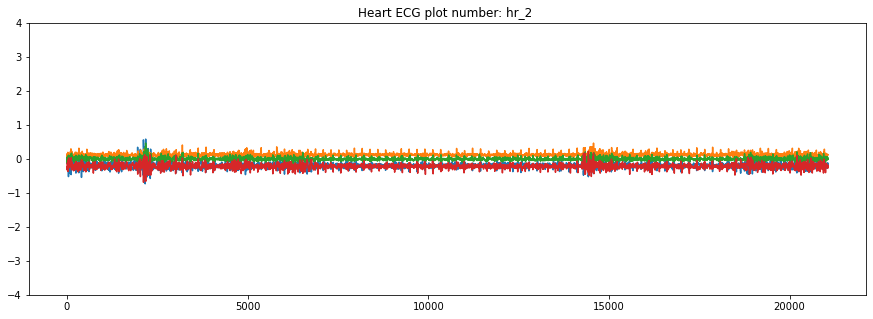

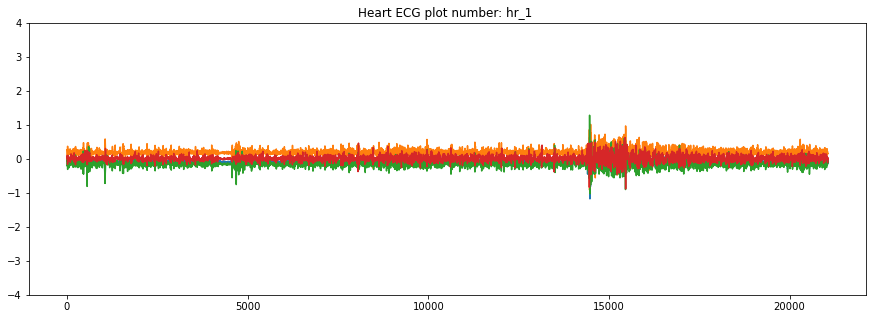

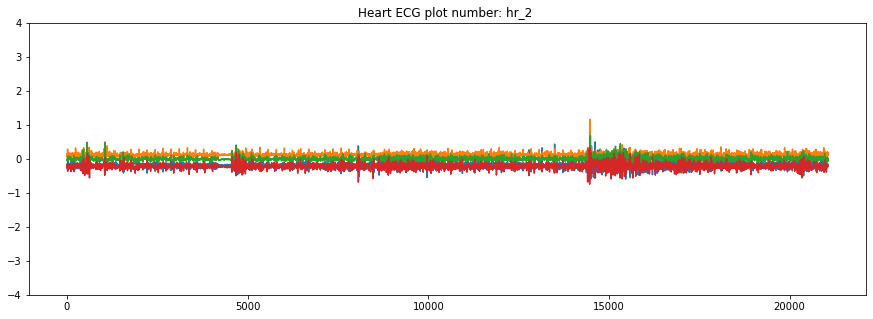

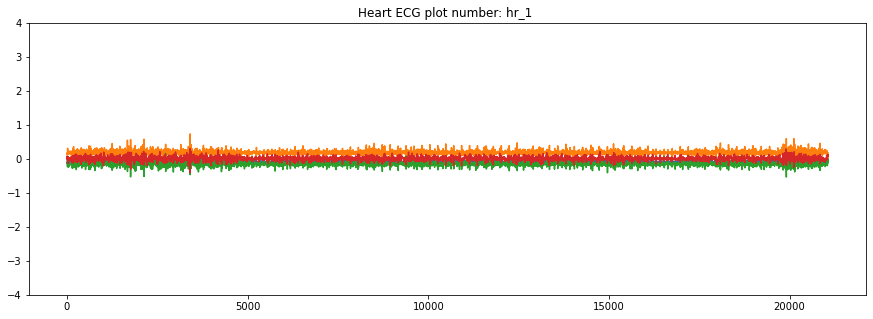

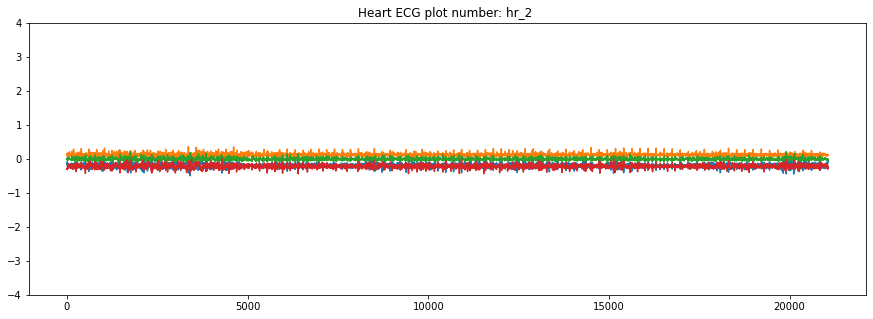

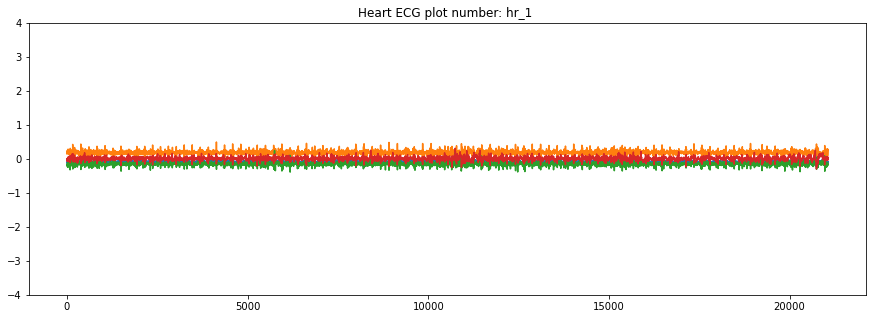

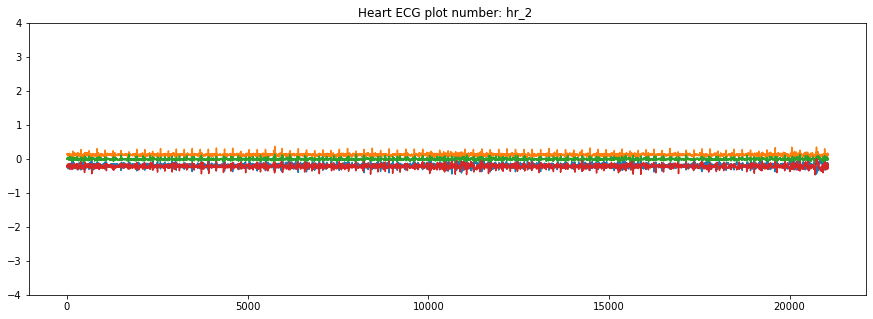

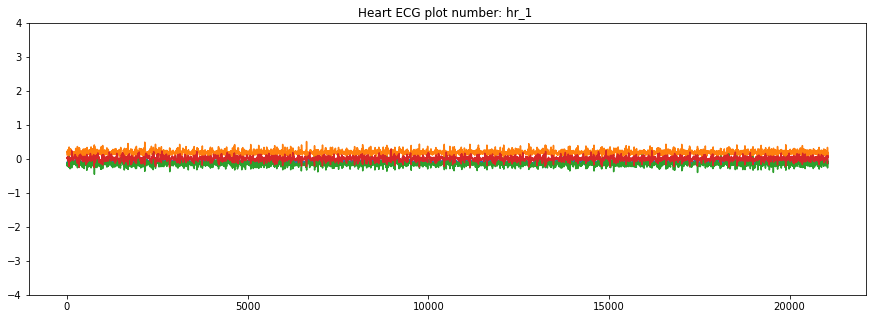

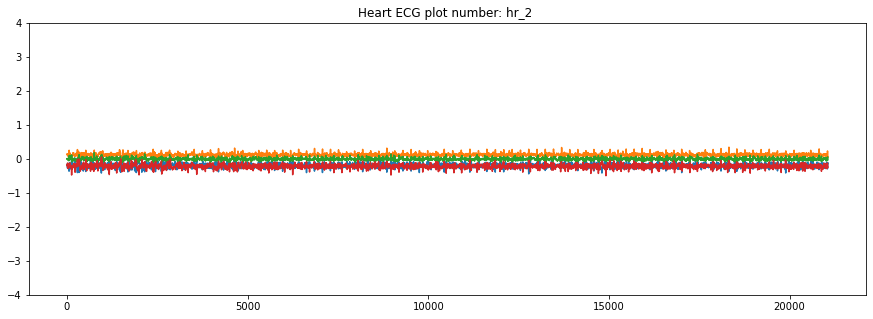

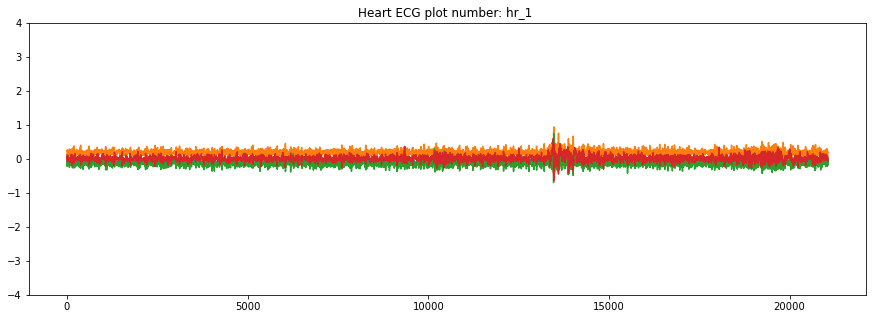

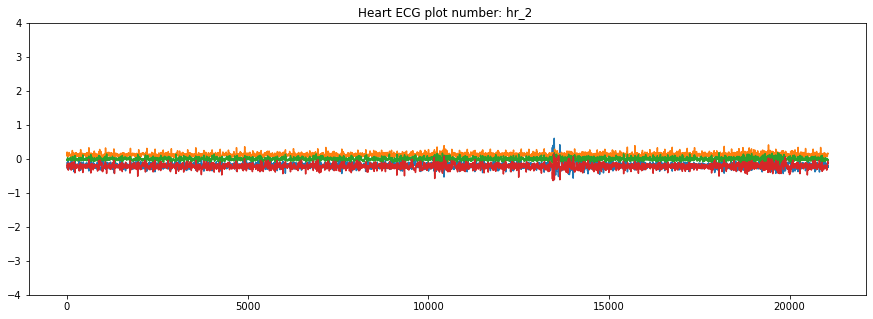

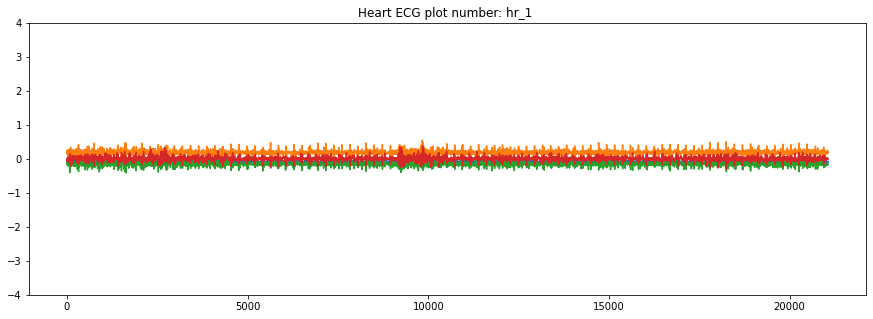

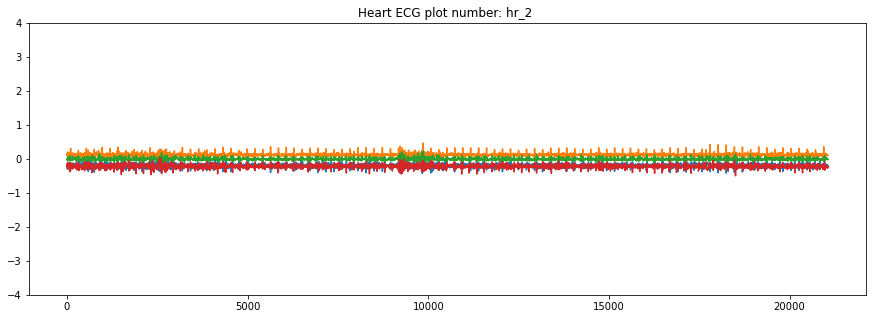

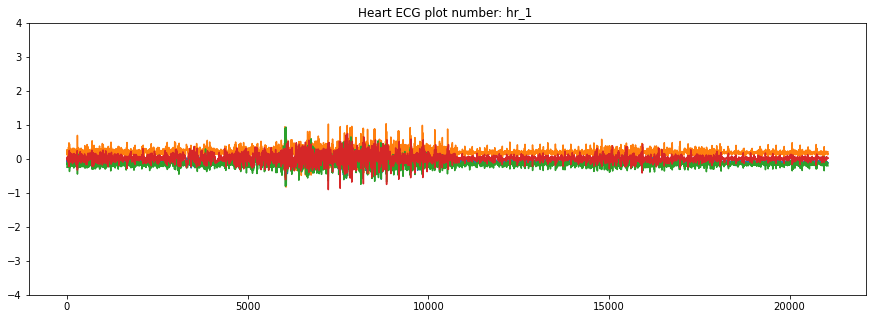

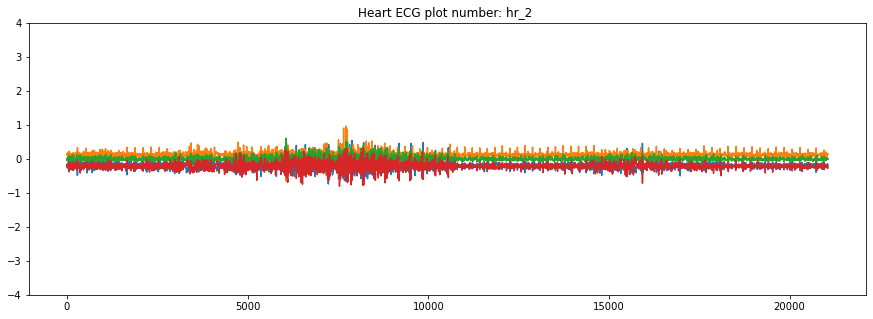

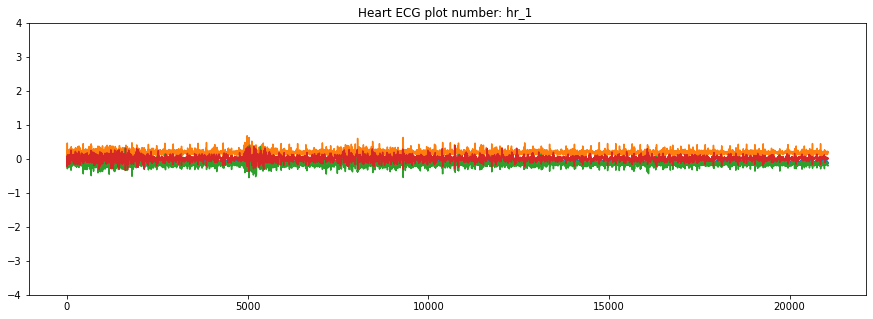

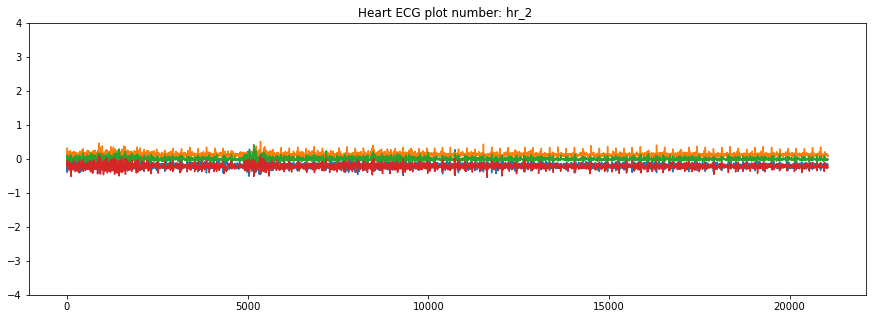

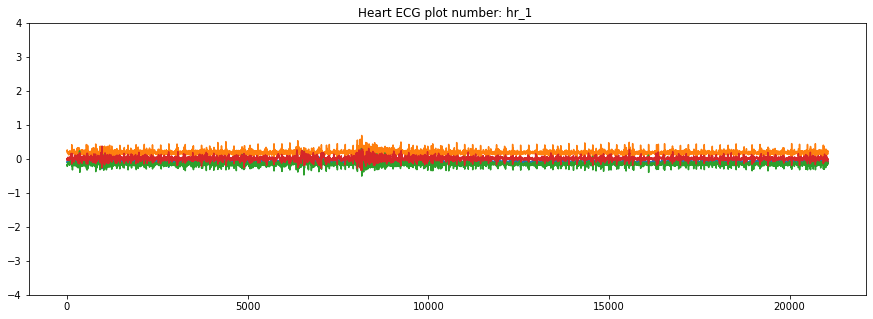

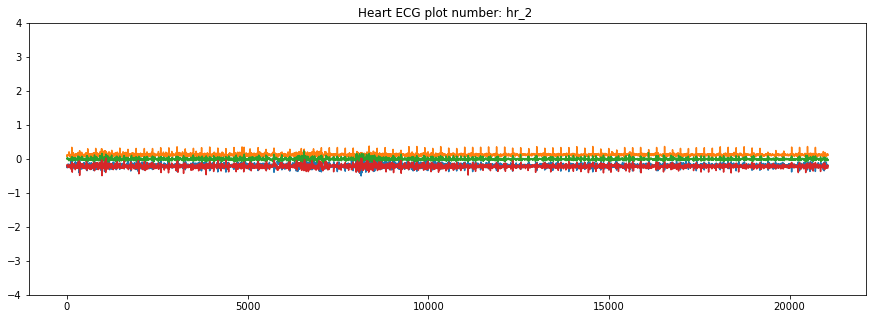

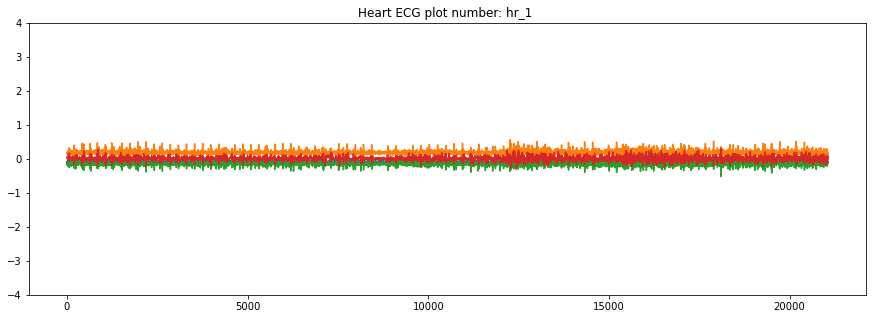

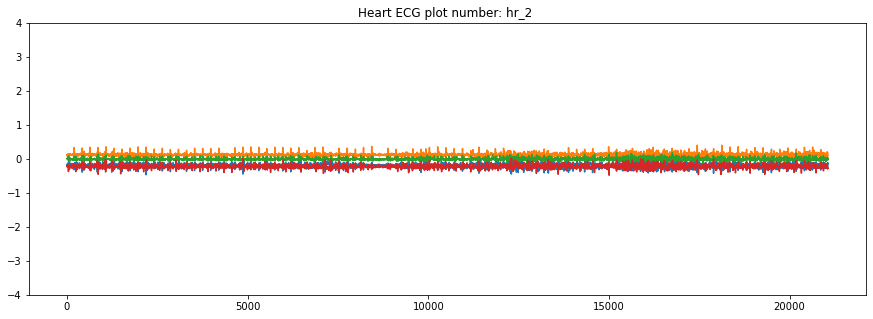

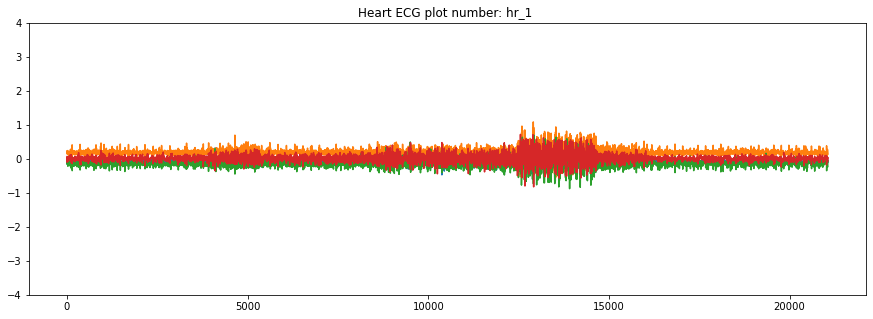

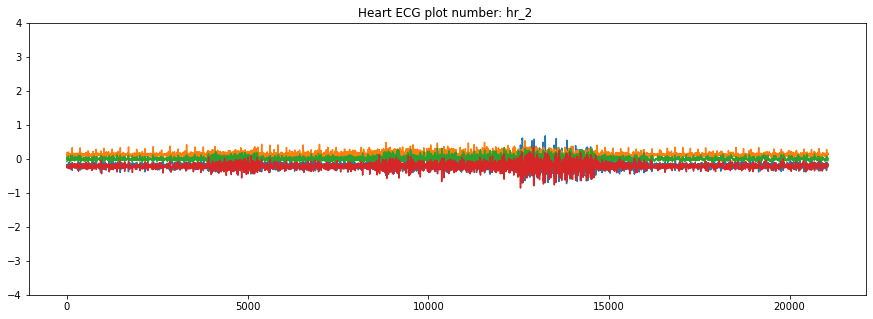

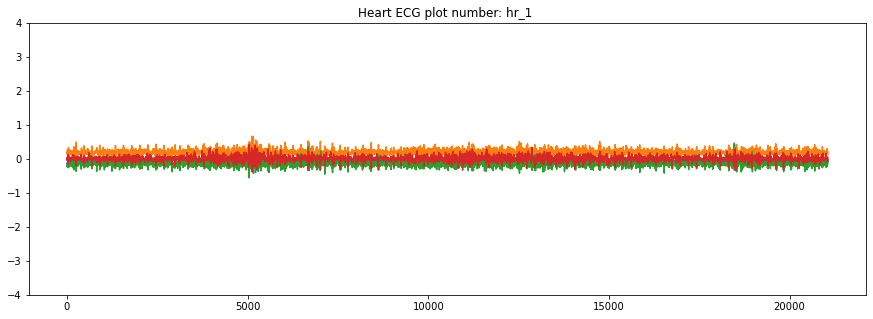

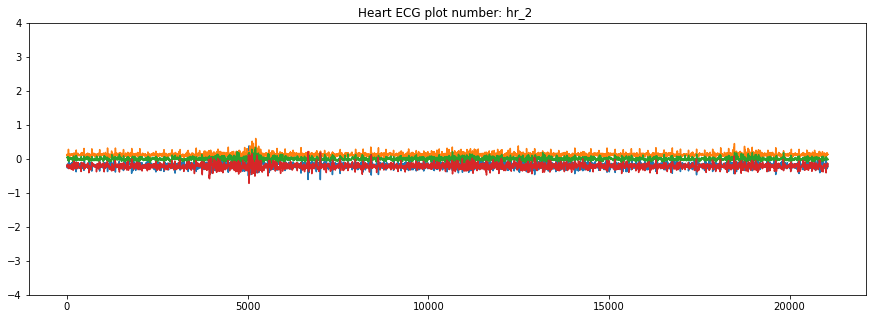

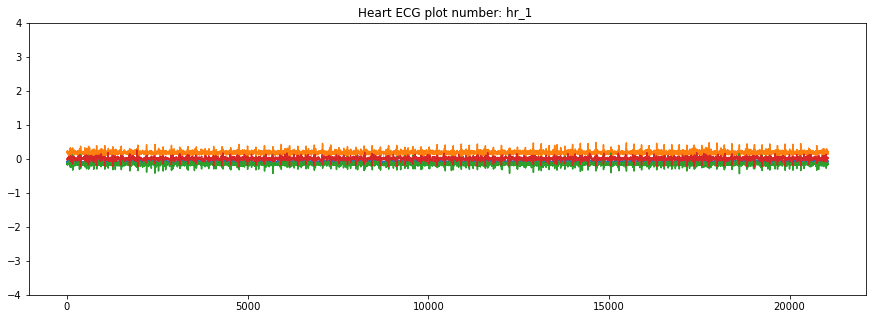

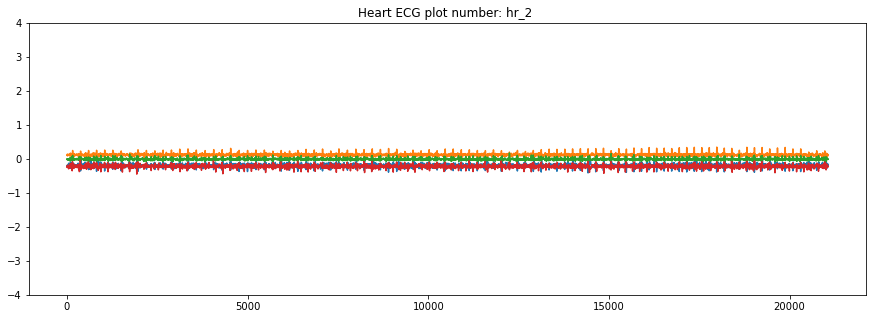

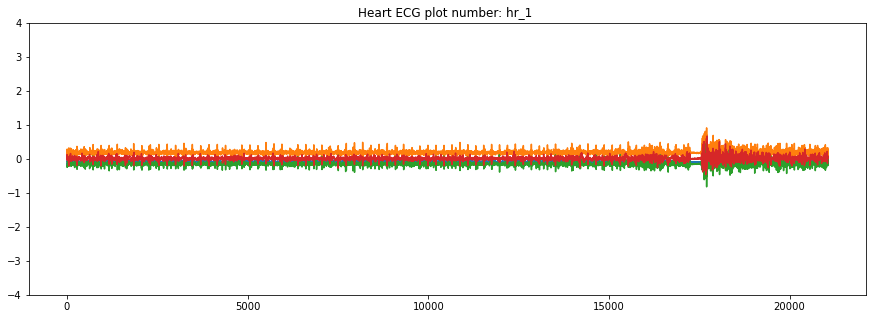

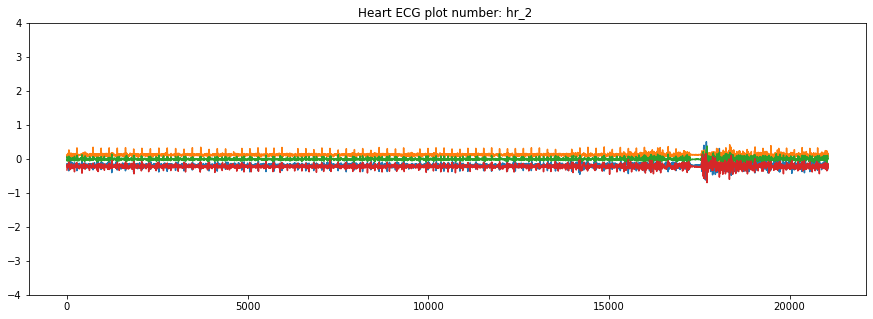

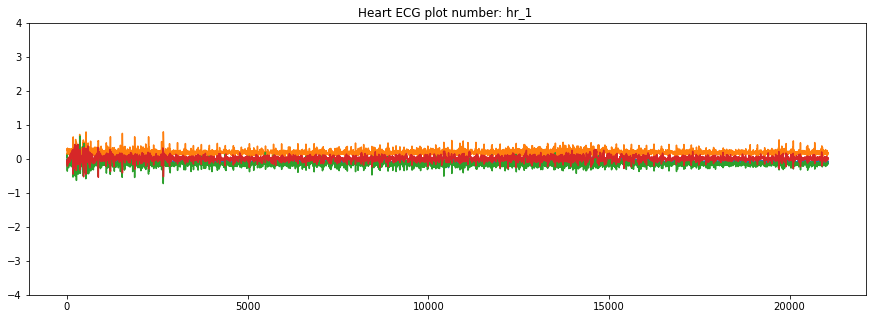

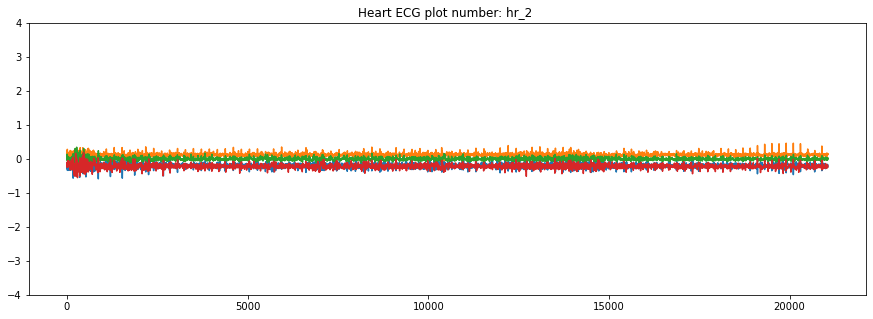

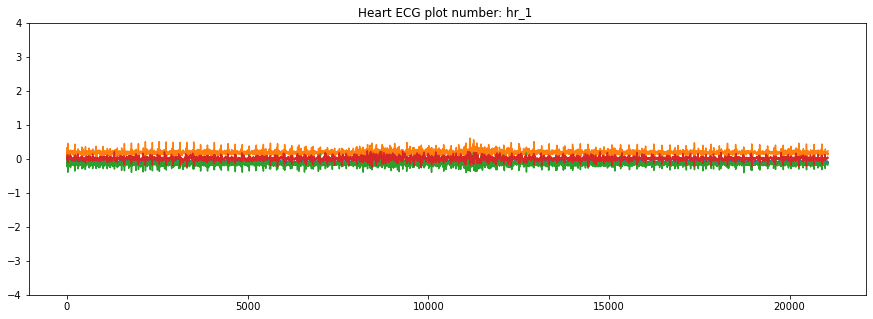

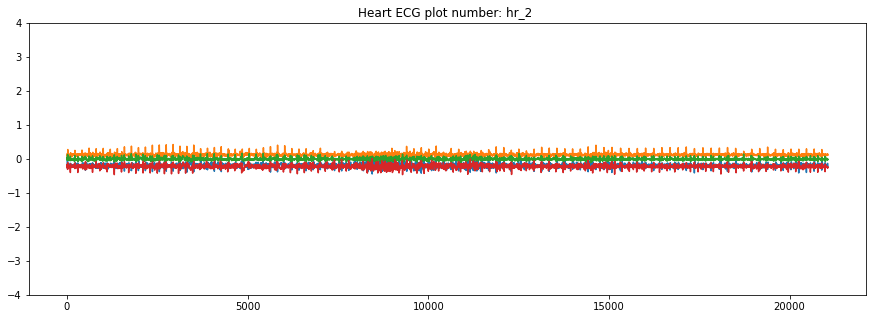

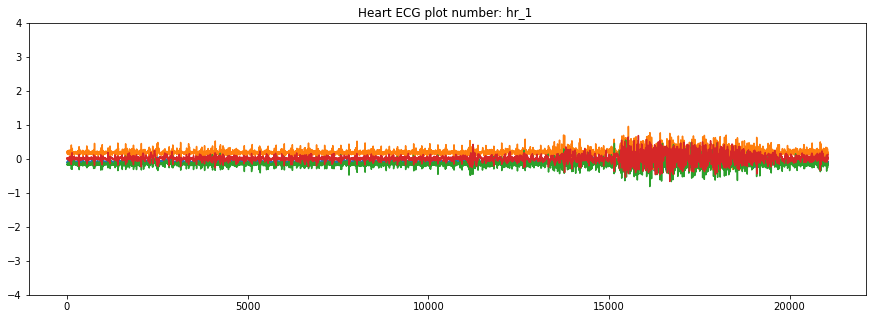

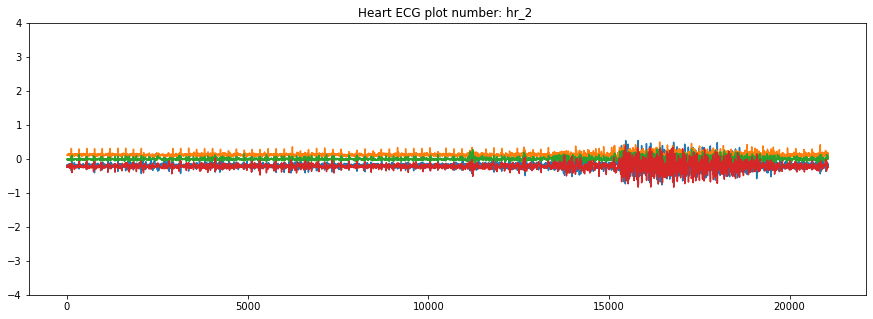

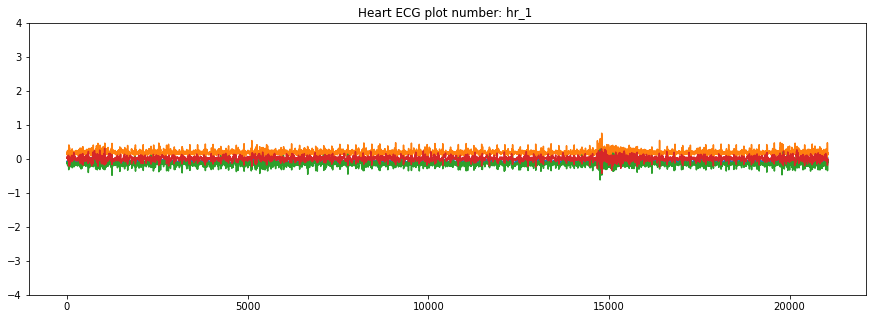

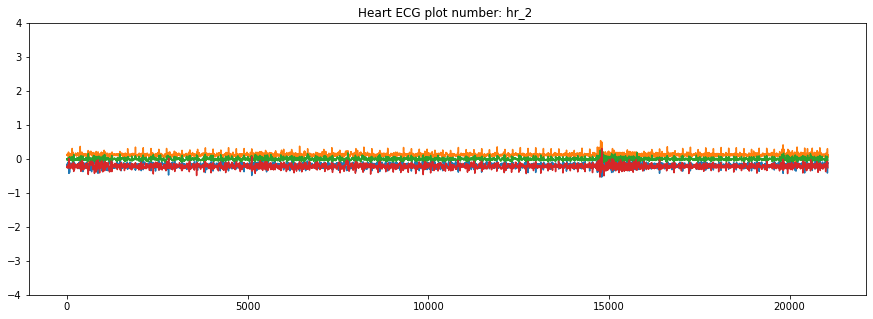

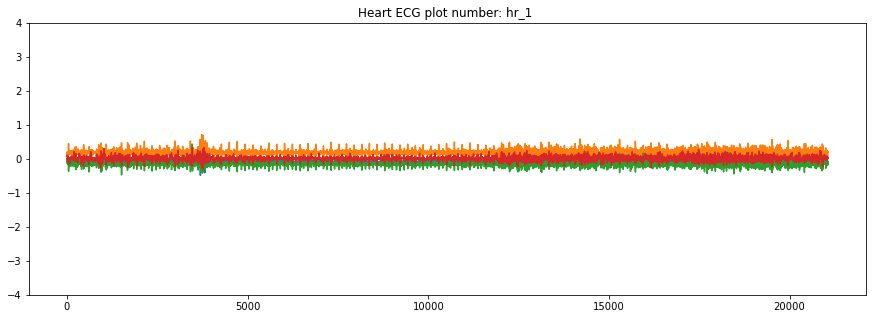

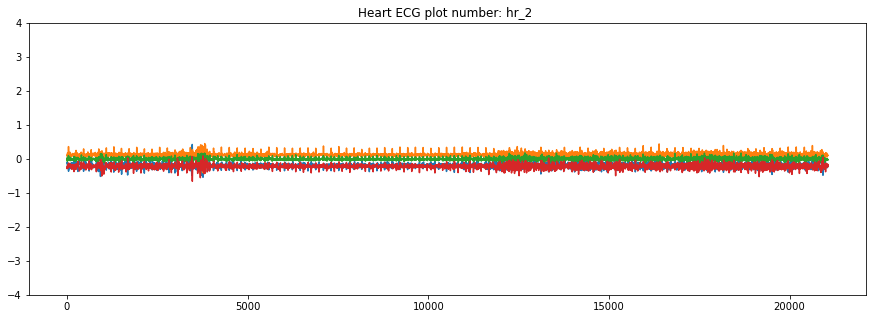

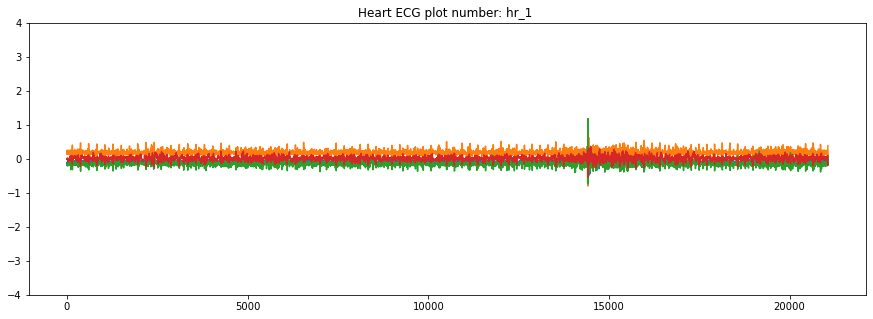

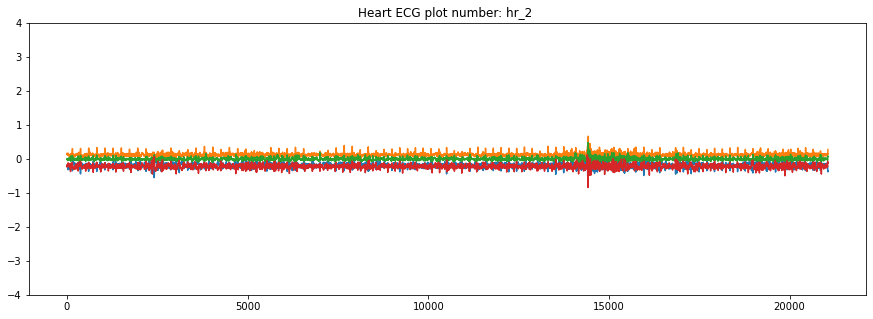

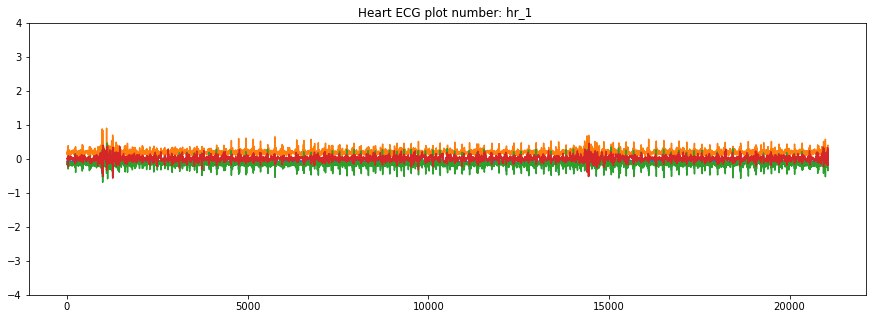

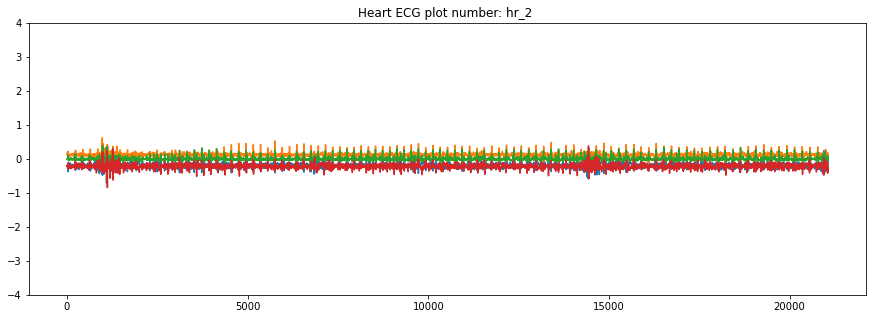

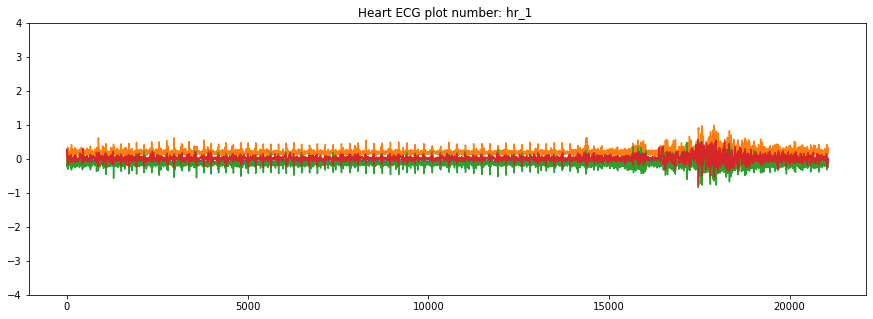

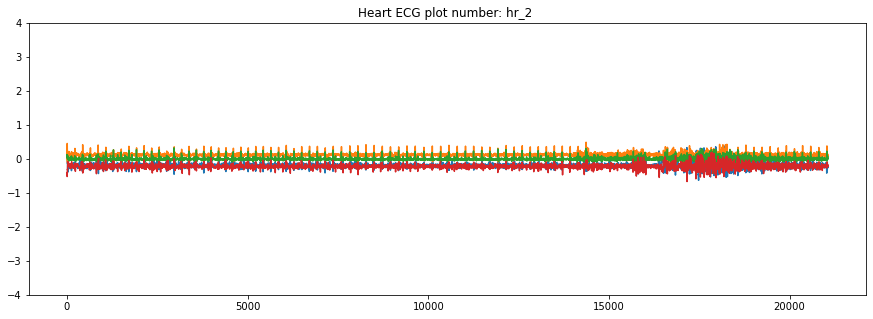

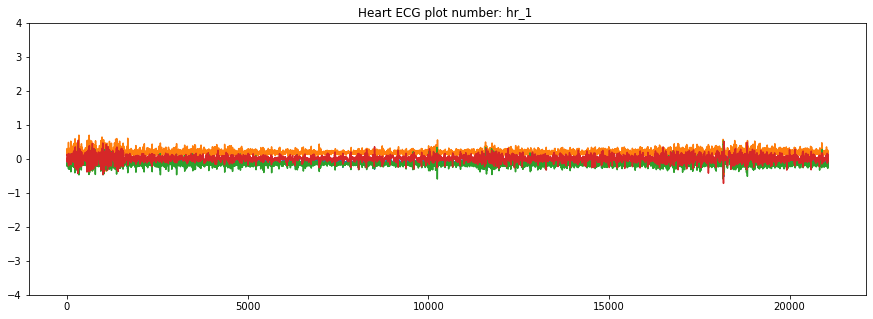

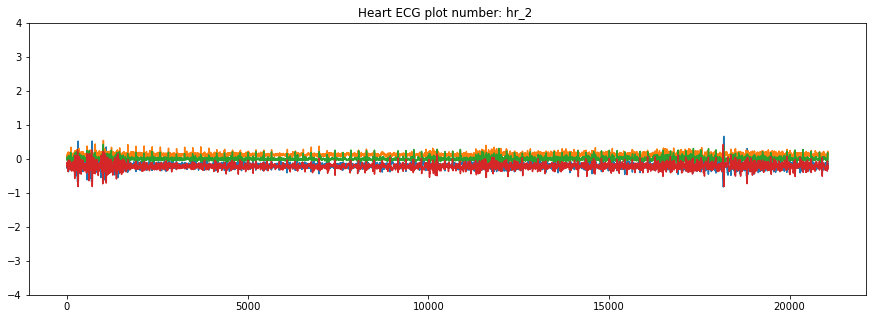

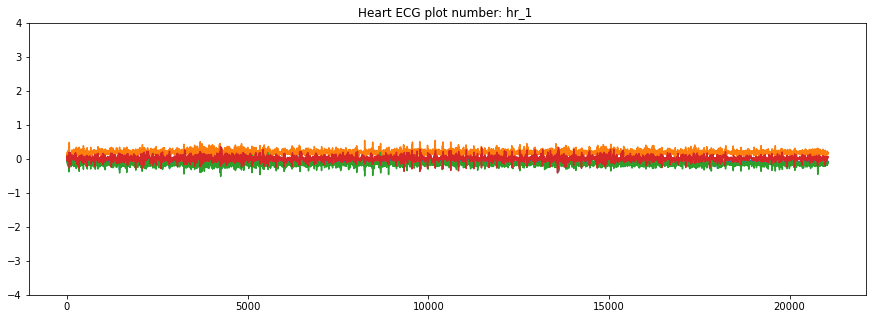

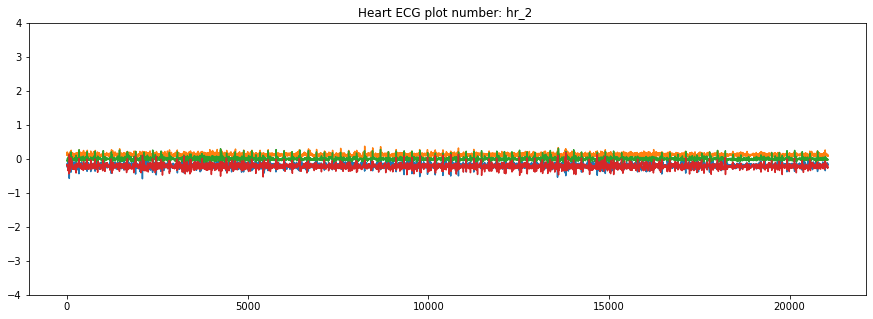

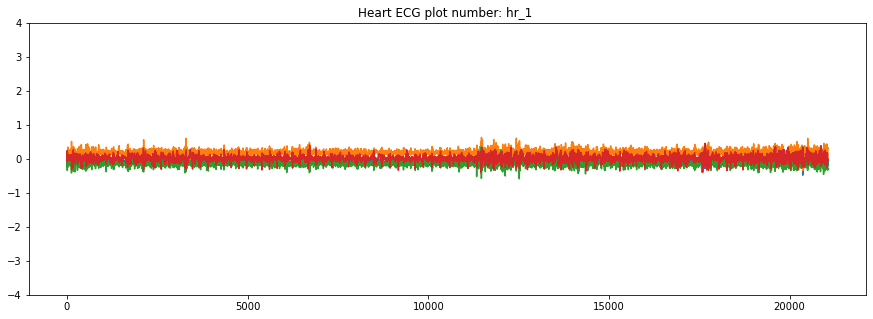

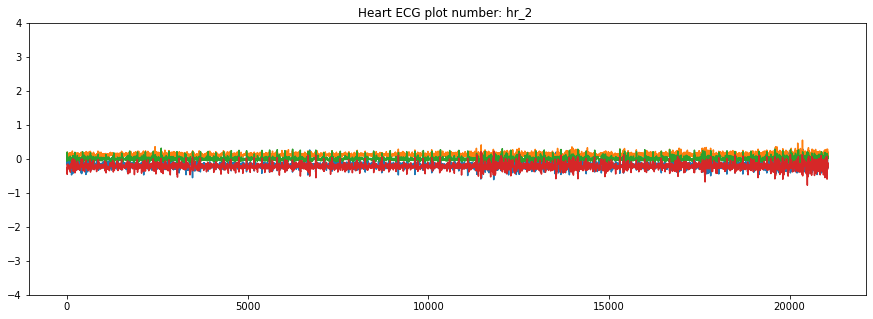

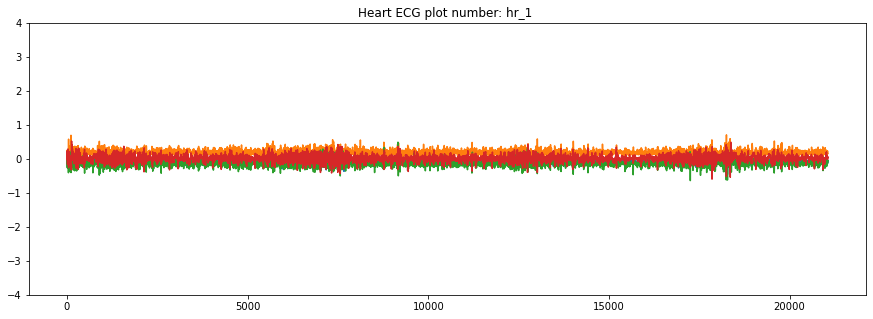

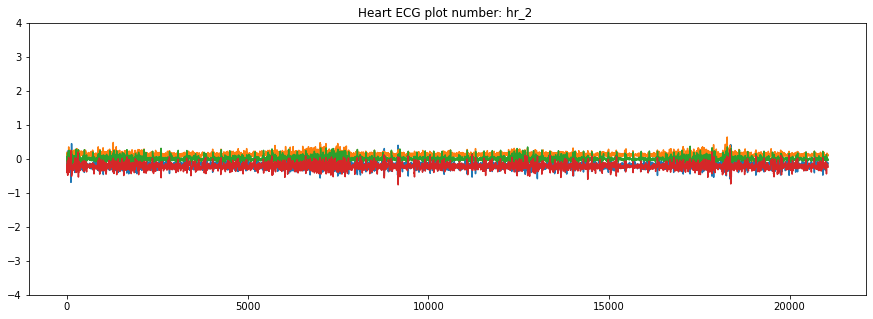

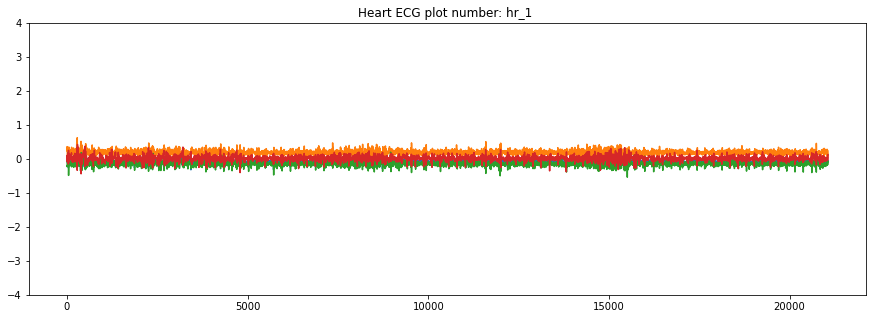

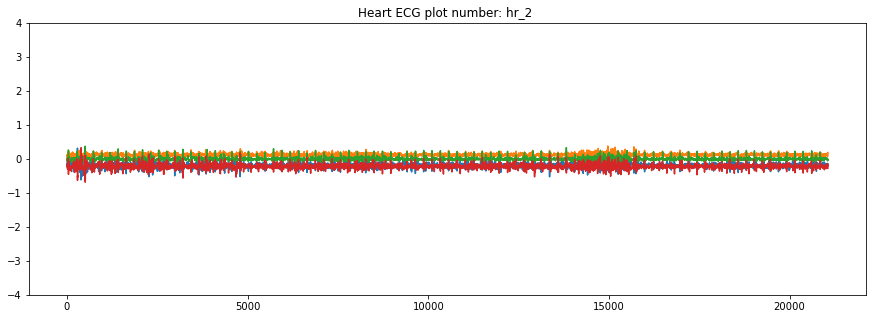

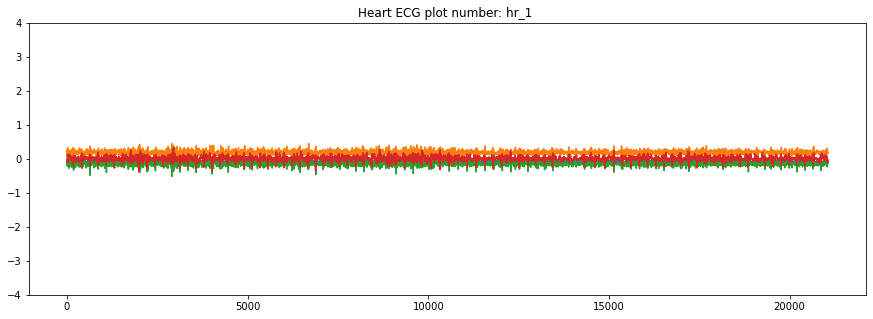

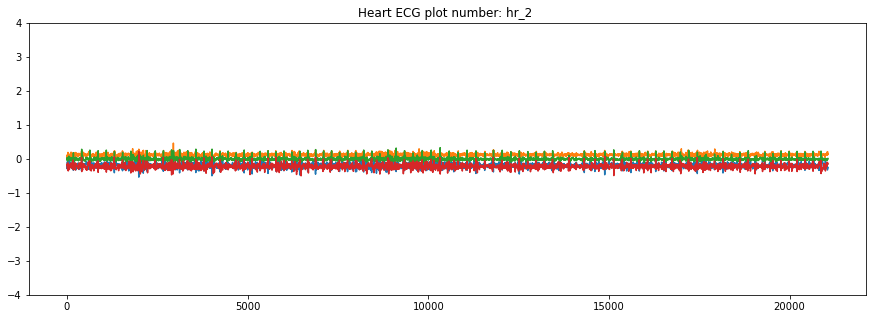

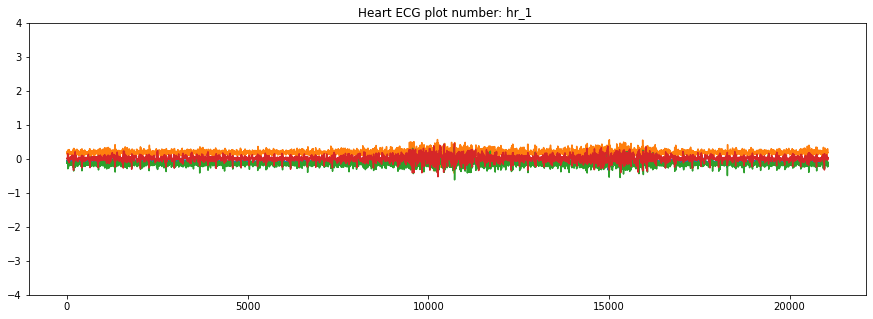

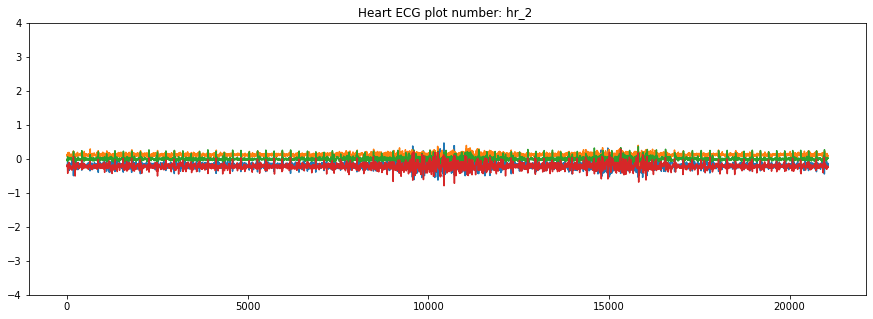

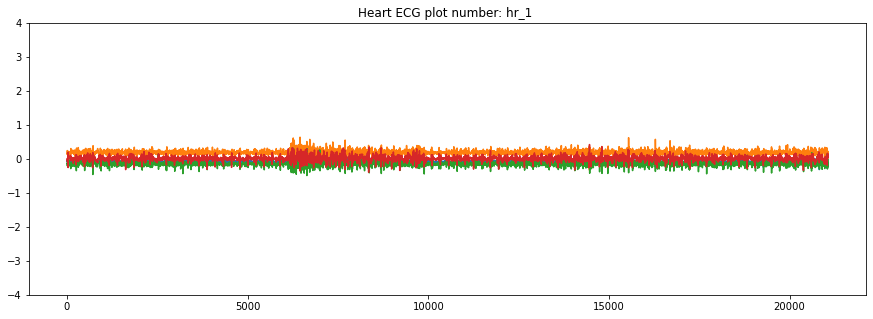

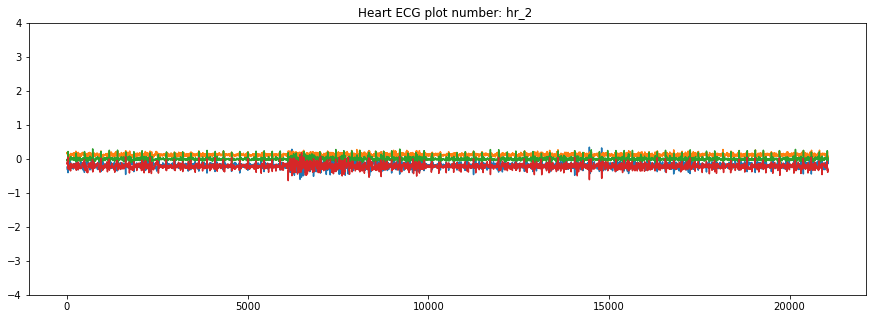

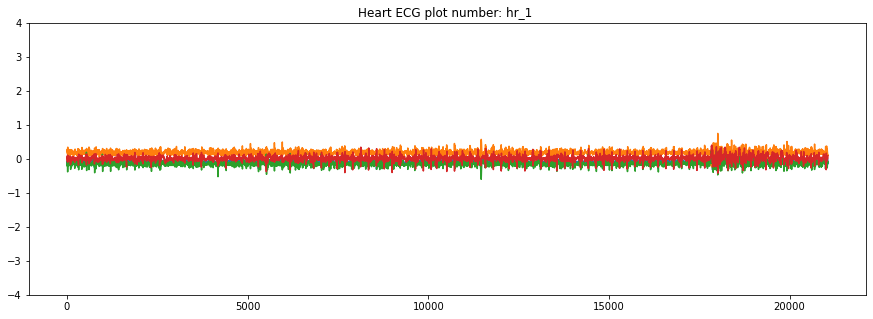

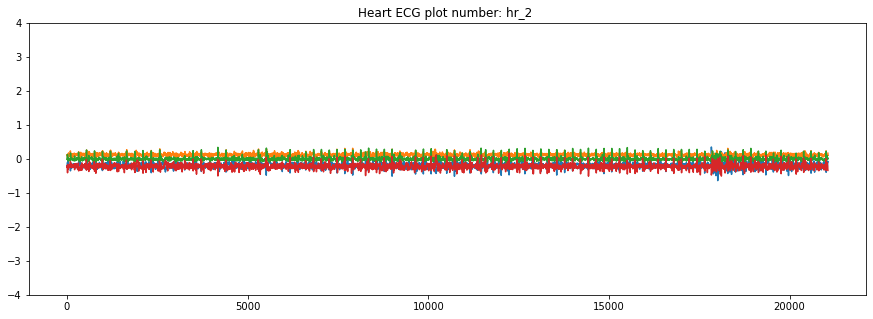

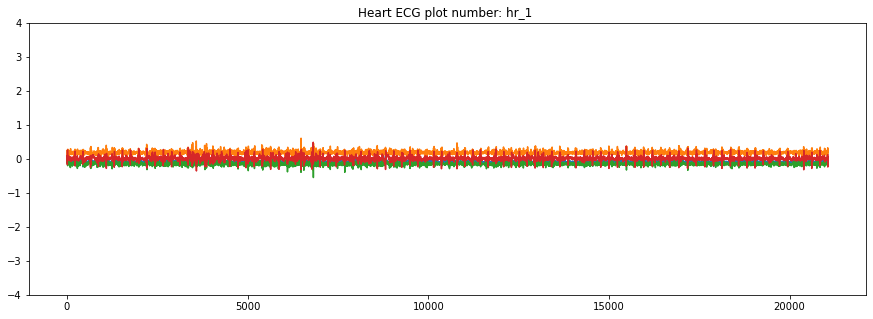

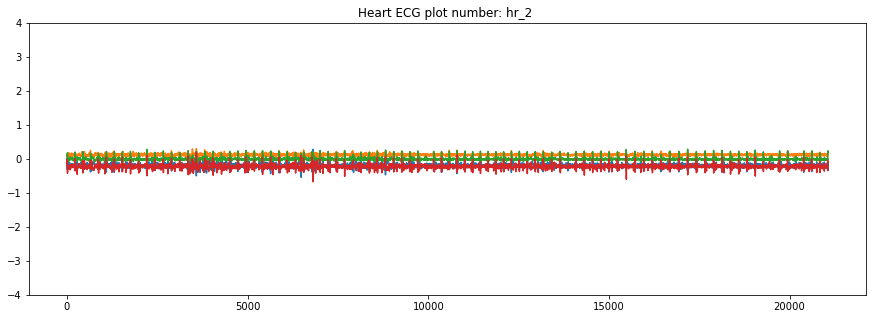

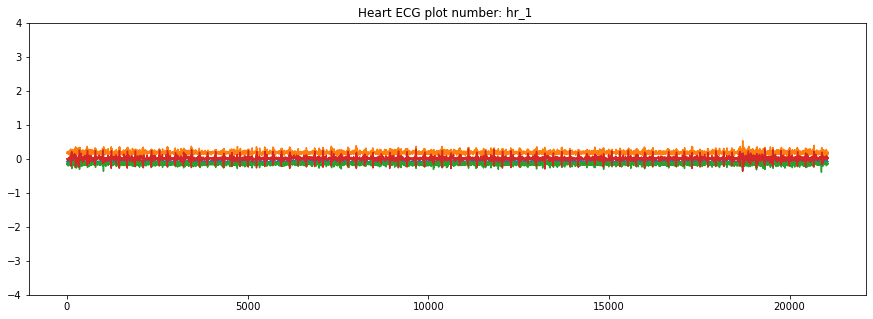

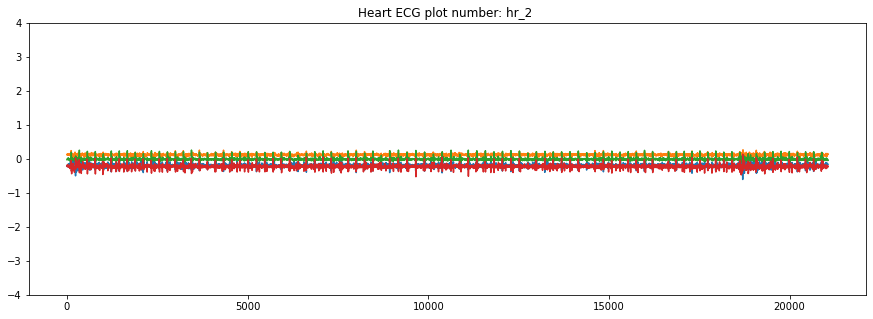

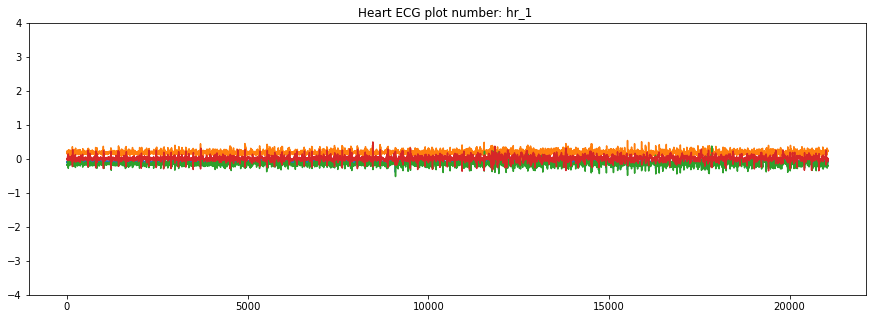

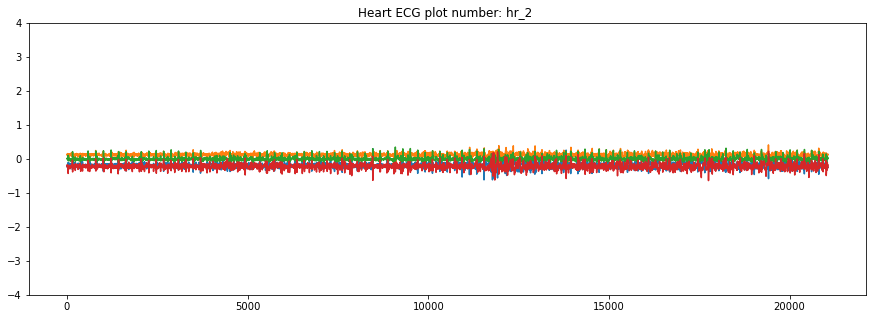

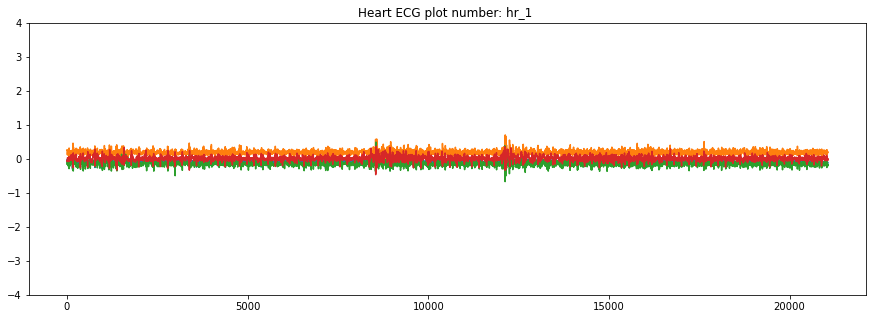

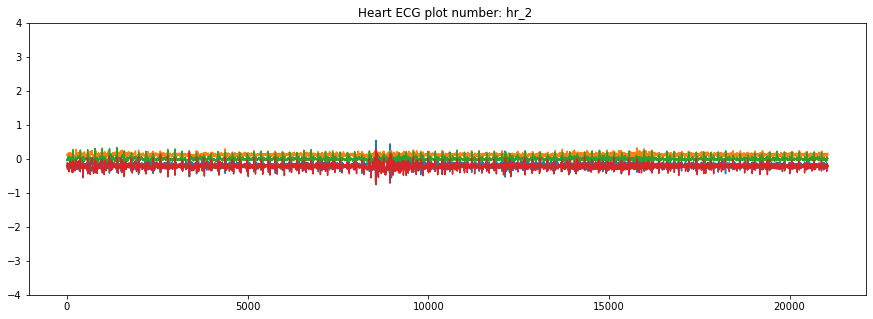

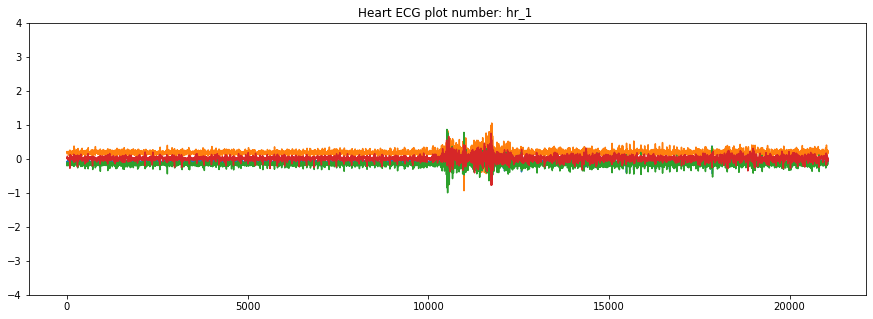

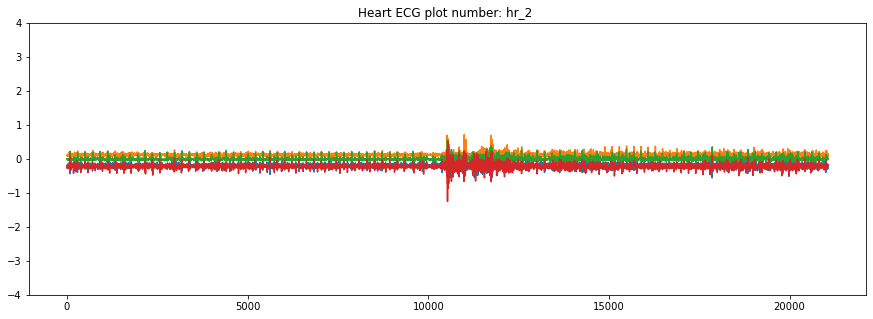

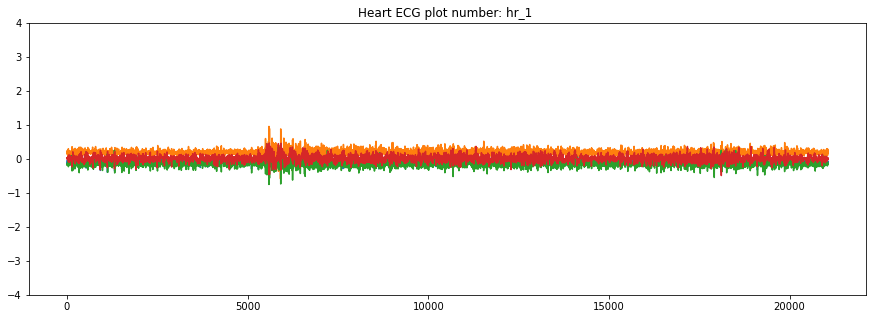

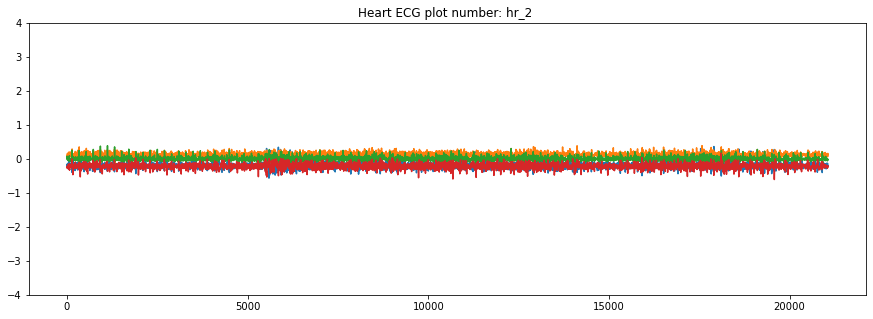

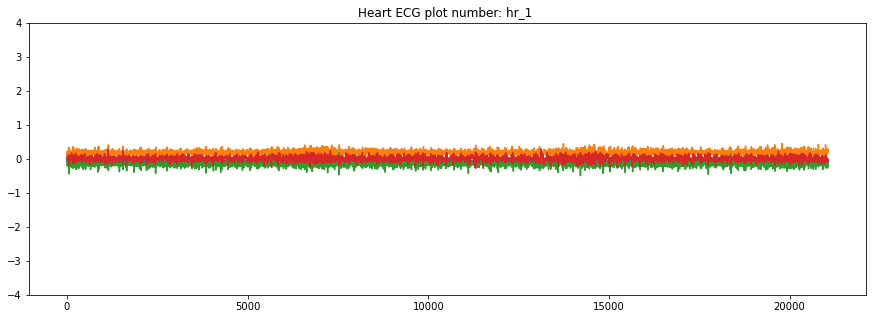

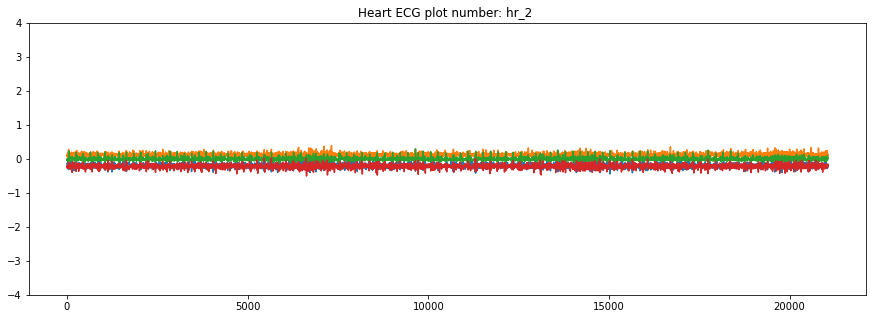

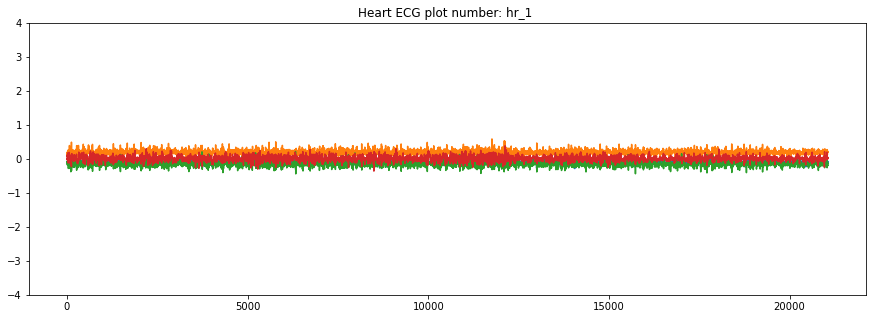

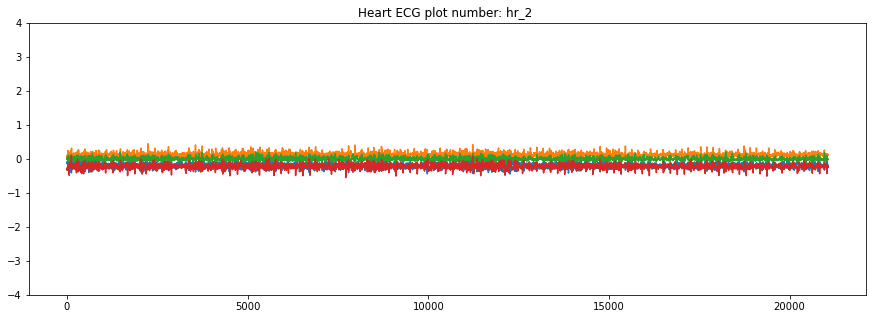

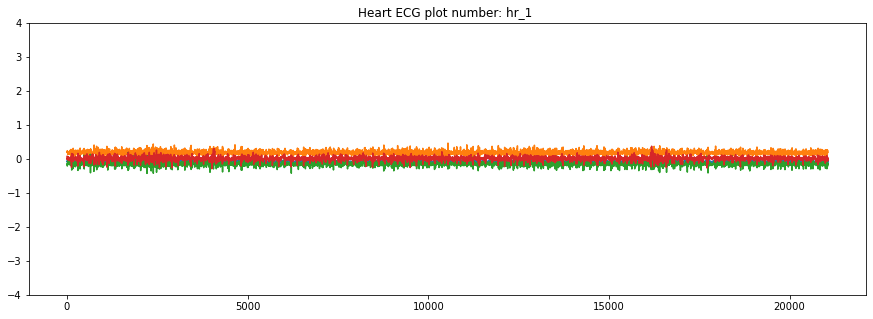

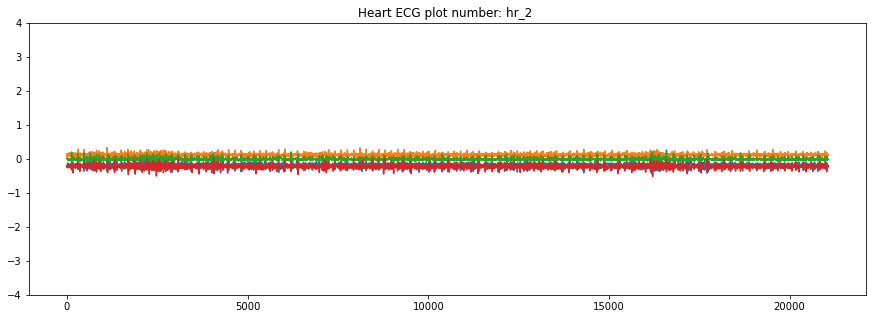

In [20]:
len_predictions, _, _ = prediction_real_data_chopped[model_config["source_names"][0]].shape

for sample in range(len_predictions):
    plot_heartecg(prediction_real_data_chopped[model_config["source_names"][0]][sample,:,:4], 'hr_1 ')
    plot_heartecg(prediction_real_data_chopped[model_config["source_names"][0]][sample,:,4:], 'hr_2 ')

Concatenate the extracted chunks of ECGs to form a long sequence again and store result in a database

In [21]:
dim_1, dim_2, _ = prediction_real_data_chopped[model_config["source_names"][0]].shape

y_pred_test1_single_all = np.zeros((1, dim_1*dim_2, model_config["num_channels"]))
y_pred_test2_single_all = np.zeros((1, dim_1*dim_2, model_config["num_channels"]))

for sample in range(dim_1):
    pred_test = prediction_real_data_chopped[model_config["source_names"][0]]
    y_pred_test1_single_all[:,sample*dim_2:(sample+1)*dim_2,:] = pred_test[sample,:,model_config["num_channels"]:]
    y_pred_test2_single_all[:,sample*dim_2:(sample+1)*dim_2,:] = pred_test[sample,:,:model_config["num_channels"]]

with h5py.File(model_config["output_path"]+f'/test_predictions_real/patient_real_short.signal', 'w') as f:
    f.create_dataset('hr_1_extracted', data=y_pred_test1_single_all)
    f.create_dataset('hr_2_extracted', data=y_pred_test2_single_all)
    f.create_dataset('twin_hr', data=real_data)

Testing real data on the model 

['hr_1_extracted', 'hr_2_extracted', 'twin_hr']
hr_1_extracted
(1, 1010880, 4)


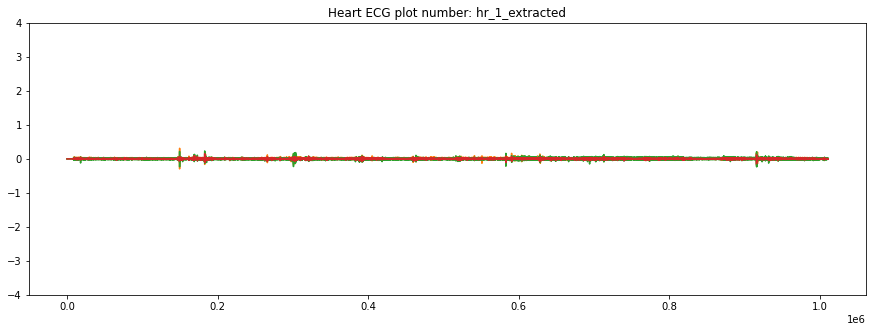

hr_2_extracted
(1, 1010880, 4)


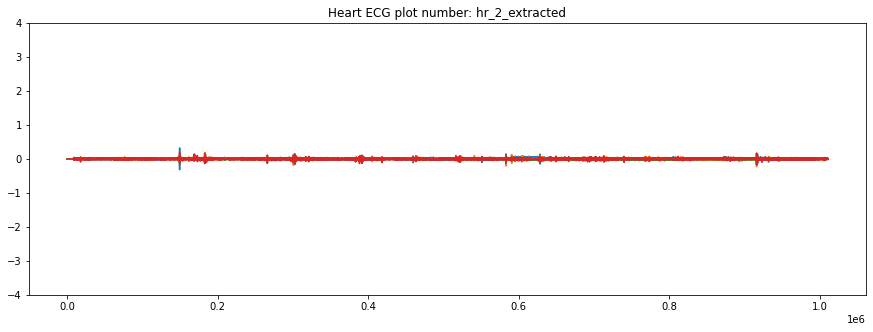

twin_hr
(1073749, 6)


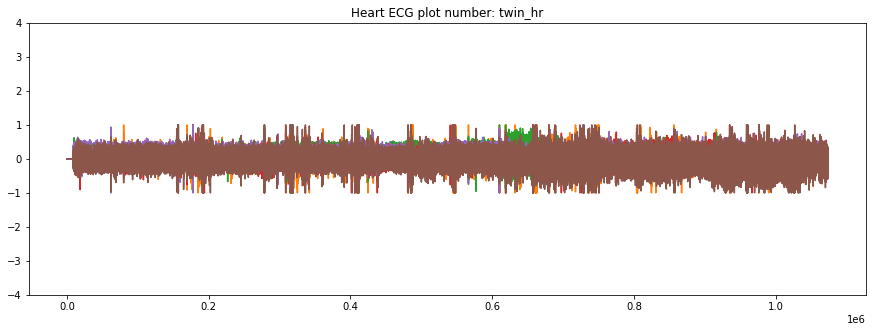

In [61]:
twin_data_analysis = []
hr_1_data_analysis = []
hr_2_data_analysis = []

with h5py.File(model_config["data_storage_path"]+f'/test_predictions_real/patient_real.signal', 'r') as f:
    key_list = list(f.keys())
    print(key_list)

    for key in key_list:
        data = np.array(f[key])
        print(key)
        print(data.shape)
        if key == 'hr_1_extracted':
            hr_1_data_analysis = data[0,:,:]
        elif key == 'hr_2_extracted':
            hr_2_data_analysis = data[0,:,:]
        elif key == 'twin_hr':
            twin_data_analysis = data
        if key==key_list[0] or key==key_list[1]:
            plot_heartecg(data[0,:,:], str(key))
        else: 
            plot_heartecg(data, str(key))
            
    

In [57]:
twin_data_analysis = np.array(twin_data_analysis)
hr_1_data_analysis = np.array(hr_1_data_analysis)
hr_2_data_analysis = np.array(hr_2_data_analysis)

In [58]:
np.array(twin_data_analysis).shape

(1073749, 6)

In [59]:
hr_1_data_analysis.shape

(1010880, 4)

Transormation might be needed dependent on how the data is stored

In [43]:
# twin_data_analysis = twin_data_analysis.T
# hr_1_data_analysis = hr_1_data_analysis.T
# hr_2_data_analysis = hr_2_data_analysis.T

In [49]:
twin_data_analysis_prediction = []

old_i = 0
for i in range(22050, twin_data_analysis.shape[0], 22050):
    twin_data_analysis_prediction.append(twin_data_analysis[old_i:i, :4])
    old_i = i

In [50]:
np.array(twin_data_analysis_prediction).shape

(48, 22050, 4)

In [51]:
prediction_t_d_a = m.predict(np.array(twin_data_analysis_prediction))

In [52]:
prediction_t_d_a.keys()

dict_keys(['heart_ecg'])

In [60]:
dim_1, dim_2, _ = prediction_t_d_a[model_config["source_names"][0]].shape

y_test1_single_all = np.zeros((1, dim_1*dim_2, model_config["num_channels"]))
y_test2_single_all = np.zeros((1, dim_1*dim_2, model_config["num_channels"]))
y_pred_test1_single_all = np.zeros((1, dim_1*dim_2, model_config["num_channels"]))
y_pred_test2_single_all = np.zeros((1, dim_1*dim_2, model_config["num_channels"]))
x_test_single_all = np.zeros((1, dim_1*model_config["input_size"], model_config["num_channels"]))

for sample in range(dim_1):

    pred_test = prediction_t_d_a[model_config["source_names"][0]]

    y_test1_single_all[:,sample*dim_2:(sample+1)*dim_2,:] = hr_1_data_analysis[sample*dim_2:(sample+1)*dim_2,:]
    y_test2_single_all[:,sample*dim_2:(sample+1)*dim_2,:] = hr_2_data_analysis[sample*dim_2:(sample+1)*dim_2,:]
    y_pred_test1_single_all[:,sample*dim_2:(sample+1)*dim_2,:] = pred_test[sample,:,model_config["num_channels"]:]
    y_pred_test2_single_all[:,sample*dim_2:(sample+1)*dim_2,:] = pred_test[sample,:,:model_config["num_channels"]]
#     x_test_single_all[:,sample*model_config["input_size"]:(sample+1)*model_config["input_size"],:] = x_test_single

with h5py.File(model_config["output_path"]+f'/test_predictions_real/patient_real_short.signal', 'w') as f:
    f.create_dataset('hr_1_original', data=y_pred_test1_single_all)
    f.create_dataset('hr_2_original', data=y_pred_test2_single_all)
    f.create_dataset('hr_1_extracted', data=y_pred_test1_single_all)
    f.create_dataset('hr_2_extracted', data=y_pred_test2_single_all)
    f.create_dataset('twin_hr', data=real_data)